In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv


# 🧠 **Alzheimer's Disease Dataset**

## 📘 Dataset Description
The **Alzheimer’s Disease Dataset** provides comprehensive health information for **2,149 patients** (IDs 4751–6900).  
It includes **demographics, lifestyle factors, medical history, clinical measurements, cognitive assessments, symptoms, and diagnosis data** — all valuable for **predictive modeling**, **statistical analysis**, and **early detection research** in Alzheimer’s Disease.

This dataset is **synthetic** and was generated for **educational and research purposes**.  
It’s ideal for classification tasks (e.g., predicting Alzheimer’s diagnosis) or correlation analysis between health factors.

---

## 📊 Feature Overview

### 🧍‍♂️ Demographic Details
| Feature | Description |
|----------|--------------|
| `Age` | Patient age (60–90 years). |
| `Gender` | 0 = Male, 1 = Female. |
| `Ethnicity` | 0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other. |
| `EducationLevel` | 0 = None, 1 = High School, 2 = Bachelor's, 3 = Higher. |

---

### 💪 Lifestyle Factors
| Feature | Description |
|----------|--------------|
| `BMI` | Body Mass Index (15–40). |
| `Smoking` | 0 = No, 1 = Yes. |
| `AlcoholConsumption` | Weekly alcohol units (0–20). |
| `PhysicalActivity` | Weekly physical activity hours (0–10). |
| `DietQuality` | Diet score (0–10). |
| `SleepQuality` | Sleep score (4–10). |

---

### 🩺 Medical History
| Feature | Description |
|----------|--------------|
| `FamilyHistoryAlzheimers` | 0 = No, 1 = Yes. |
| `CardiovascularDisease` | 0 = No, 1 = Yes. |
| `Diabetes` | 0 = No, 1 = Yes. |
| `Depression` | 0 = No, 1 = Yes. |
| `HeadInjury` | 0 = No, 1 = Yes. |
| `Hypertension` | 0 = No, 1 = Yes. |

---

### 🧬 Clinical Measurements
| Feature | Description |
|----------|--------------|
| `SystolicBP` | Systolic blood pressure (90–180 mmHg). |
| `DiastolicBP` | Diastolic blood pressure (60–120 mmHg). |
| `CholesterolTotal` | Total cholesterol (150–300 mg/dL). |
| `CholesterolLDL` | LDL cholesterol (50–200 mg/dL). |
| `CholesterolHDL` | HDL cholesterol (20–100 mg/dL). |
| `CholesterolTriglycerides` | Triglycerides (50–400 mg/dL). |

---

### 🧠 Cognitive & Functional Assessments
| Feature | Description |
|----------|--------------|
| `MMSE` | Mini-Mental State Examination (0–30) — lower = more impairment. |
| `FunctionalAssessment` | Functional performance score (0–10). |
| `MemoryComplaints` | 0 = No, 1 = Yes. |
| `BehavioralProblems` | 0 = No, 1 = Yes. |
| `ADL` | Activities of Daily Living score (0–10) — lower = more impairment. |

---

### ⚠️ Symptoms
| Feature | Description |
|----------|--------------|
| `Confusion` | 0 = No, 1 = Yes. |
| `Disorientation` | 0 = No, 1 = Yes. |
| `PersonalityChanges` | 0 = No, 1 = Yes. |
| `DifficultyCompletingTasks` | 0 = No, 1 = Yes. |
| `Forgetfulness` | 0 = No, 1 = Yes. |

---

### 🧾 Diagnosis
| Feature | Description |
|----------|--------------|
| `Diagnosis` | Target variable: 0 = No Alzheimer's, 1 = Alzheimer's. |

---

### 🔒 Confidential Information
| Feature | Description |
|----------|--------------|
| `DoctorInCharge` | Confidential identifier ("XXXConfid"). |

---

## 🧩 Summary
This dataset provides a holistic view of patient health and cognitive data, making it perfect for:
- **Classification models** (e.g., Alzheimer’s prediction).  
- **Correlation and regression analysis.**  
- **Feature importance and explainable AI studies.**

---


# **Data Gathering & Exploration**

In [ ]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install optuna

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import pickle

In [ ]:
# Read dataset
df = pd.read_csv('/kaggle/input/alzheimers-disease-dataset/alzheimers_disease_data.csv')

In [ ]:
# Show sample of data
print("Sample of rows in in dataset:")
df.sample(6)

Sample of rows in in dataset:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
663,5414,63,1,0,1,24.691523,0,15.589329,0.833782,4.985026,...,0,0,8.835624,0,0,0,0,1,0,XXXConfid
21,4772,65,0,1,2,37.543943,1,12.063959,9.126038,3.531207,...,0,0,3.001114,0,0,0,1,0,0,XXXConfid
2101,6852,78,1,0,2,18.224026,1,8.780669,4.315768,0.844571,...,0,0,0.461200,0,1,1,0,0,1,XXXConfid
574,5325,68,0,1,0,25.349937,1,4.890839,6.238313,7.664498,...,1,0,5.268329,1,1,0,0,0,0,XXXConfid
1998,6749,63,1,3,0,32.332153,0,18.133869,9.504678,0.916159,...,0,0,1.089879,0,0,0,0,0,0,XXXConfid
1507,6258,82,1,0,0,32.912732,0,7.858106,7.495348,7.517459,...,0,1,0.203655,0,0,0,0,0,1,XXXConfid


In [ ]:
# Display num of (rows, cols)
print("Dimensions of the Dataset (Rows, Columns):", df.shape)

Dimensions of the Dataset (Rows, Columns): (2149, 35)


In [ ]:
# Display diff information about data
print("Overview of the features and their types:")
df.info()

Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabet

> Dataset has 2149 samples, 34 features, 1 target feature (Diagnosis)

> Dataset hasn't any null values

> All features numeric except DoctorInCharge is categorical feature 'object'

In [ ]:
# Getting a statistical summary of the dataset: numerical features
print("Statistical summary of numeric features:")
df.describe().T

Statistical summary of numeric features:


,count,mean,std,min,25%,50%,75%,max
PatientID,2149.0,5825.000000,620.507185,4751.000000,5288.000000,5825.000000,6362.000000,6899.000000
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346


## 📈 Key Insights from Statistical Summary

### 🧍 Demographics
- **Average Age:** ~75 years, with a range from 60 to 90 → dataset focuses on older adults (the main risk group for Alzheimer’s).
- **Gender Distribution:** Balanced (~50.6% Female, 49.4% Male).
- **Education Level:** Median level corresponds to “High School,” suggesting most participants have moderate education.

---

### 💪 Lifestyle Patterns
- **BMI:** Average ~27.7 → most participants are in the *overweight* category.
- **Smoking:** Only ~29% are smokers.
- **Alcohol Consumption:** Average of 10 units/week, with a wide range (0–20) → indicates varied drinking habits.
- **Physical Activity:** Average ~5 hours/week → moderate physical engagement.
- **Diet & Sleep Quality:** Both average around 5–7/10, suggesting fair but not excellent lifestyle habits.

---

### 🩺 Medical History
- **Family History of Alzheimer’s:** ~25% of participants → notable genetic risk factor.
- **Chronic Conditions:**
  - Cardiovascular Disease: ~14%
  - Diabetes: ~15%
  - Depression: ~20%
  - Hypertension: ~15%
  - Head Injury: ~9%
- Indicates **coexisting health conditions are present but not dominant**, providing useful comorbidity signals.

---

### 🧬 Clinical Measurements
- **Blood Pressure:** Average 134/90 mmHg → slightly elevated, indicating mild hypertension.
- **Cholesterol:**
  - Total: Mean 225 mg/dL → borderline high.
  - LDL: Mean 124 mg/dL → near upper healthy limit.
  - HDL: Mean 59 mg/dL → healthy.
  - Triglycerides: Mean 228 mg/dL → above the normal range → **possible cardiovascular risks** in many patients.

---

### 🧠 Cognitive & Functional Performance
- **MMSE (Mini-Mental State Exam):** Mean ~14.8 (out of 30) → **moderate cognitive impairment** on average.
- **FunctionalAssessment & ADL:** Means around 5/10 → indicates **reduced daily functioning** among many patients.
- **MemoryComplaints (~21%)** and **BehavioralProblems (~16%)** suggest cognitive symptoms are prevalent.

---

### ⚠️ Symptom Indicators
- Common symptoms:
  - **Forgetfulness:** ~30%
  - **Confusion:** ~20%
  - **Disorientation / Personality Changes:** ~15%
- These symptoms correlate strongly with cognitive decline markers.

---

### 🧾 Diagnosis
- **Alzheimer’s Diagnosed:** ~35% of the patients (1 in 3) → provides good class balance for supervised learning tasks.
- **Non-Alzheimer’s:** ~65% → sufficient contrast group for comparison.

---

### 🔍 Overall Insights
- The dataset represents a **diverse elderly population** with varying lifestyle and health factors.
- There’s a **moderate prevalence of Alzheimer’s** (35%) and **clear clinical diversity** across blood pressure, cholesterol, and cognition.
- **Potentially predictive features:** MMSE, FunctionalAssessment, FamilyHistoryAlzheimers, and Triglycerides are likely to show **strong correlation** with diagnosis.
- Dataset appears **balanced enough** for building robust machine learning models (classification or regression).

---



In [ ]:
# Getting a statistical summary of the dataset: categorical features
print("Statistical summary of categorical features:")
df.describe(include=object)

Statistical summary of categorical features:


,DoctorInCharge
count,2149
unique,1
top,XXXConfid
freq,2149


## 🧾 Categorical Feature Insights

### 🔒 DoctorInCharge
- **Unique Values:** 1  
- **Most Frequent Value:** `"XXXConfid"` (appears in all 2,149 records)  
- **Interpretation:**  
  - This field contains **confidential placeholder data**, not meaningful for analysis or modeling.  
  - It shows no variation across records, so it can be **safely dropped** during data preprocessing.

✅ **Conclusion:**  
`DoctorInCharge` serves as a privacy-preserving dummy field and provides **no analytical value** — it should be excluded from feature selection and model training.


In [ ]:
# Dropping DoctorInCharge; cause it has no analytical value
df = df.drop('DoctorInCharge', axis=1)

You can use inplace method also without the need of reassign:
```python
df.drop('DoctorInCharge', axis=1, inplace=True)

In [ ]:
# Dropping PatientID; not important
df.drop(['PatientID'],axis=1,inplace=True)

In [ ]:
# Checking dim of dataset after dropping DoctorInCharge col
df.shape

(2149, 33)

In [ ]:
# Checking duplicated rows
print("The number of duplicated rows is:", df.duplicated().sum())

The number of duplicated rows is: 0


> Dataset hasn't any duplicated rows

In [ ]:
# Create a copy for visualization
df_vis = df.copy()

In [ ]:
# Mapping dictionary for all categorical features
mapping = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'EducationLevel': {0: 'None', 1: 'High School', 2: "Bachelor's", 3: 'Higher'},
    'Smoking': {0: 'Non-smoker', 1: 'Smoker'},
    'FamilyHistoryAlzheimers': {0: 'No', 1: 'Yes'},
    'CardiovascularDisease': {0: 'No', 1: 'Yes'},
    'Diabetes': {0: 'No', 1: 'Yes'},
    'Depression': {0: 'No', 1: 'Yes'},
    'HeadInjury': {0: 'No', 1: 'Yes'},
    'Hypertension': {0: 'No', 1: 'Yes'},
    'MemoryComplaints': {0: 'No', 1: 'Yes'},
    'BehavioralProblems': {0: 'No', 1: 'Yes'},
    'Confusion': {0: 'No', 1: 'Yes'},
    'Disorientation': {0: 'No', 1: 'Yes'},
    'PersonalityChanges': {0: 'No', 1: 'Yes'},
    'DifficultyCompletingTasks': {0: 'No', 1: 'Yes'},
    'Forgetfulness': {0: 'No', 1: 'Yes'},
    'Diagnosis': {0: "No Alzheimer's", 1: "Alzheimer's"}
}

In [ ]:
# Apply the mapping to the dataframe
for col, map_dict in mapping.items():
    if col in df_vis.columns:
        df_vis[col] = df_vis[col].map(map_dict)

In [ ]:
# Check the first few rows to verify
df_vis.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,Male,Caucasian,Bachelor's,22.927749,Non-smoker,13.297218,6.327112,1.347214,9.025679,...,6.518877,No,No,1.725883,No,No,No,Yes,No,No Alzheimer's
1,89,Male,Caucasian,None,26.827681,Non-smoker,4.542524,7.619885,0.518767,7.151293,...,7.118696,No,No,2.592424,No,No,No,No,Yes,No Alzheimer's
2,73,Male,Other,High School,17.795882,Non-smoker,19.555085,7.844988,1.826335,9.673574,...,5.895077,No,No,7.119548,No,Yes,No,Yes,No,No Alzheimer's
3,74,Female,Caucasian,High School,33.800817,Smoker,12.209266,8.428001,7.435604,8.392554,...,8.965106,No,Yes,6.481226,No,No,No,No,No,No Alzheimer's
4,89,Male,Caucasian,None,20.716974,Non-smoker,18.454356,6.310461,0.795498,5.597238,...,6.045039,No,No,0.014691,No,No,Yes,Yes,No,No Alzheimer's


# **Exploratory Data Analysis**

## Univariate Analysis

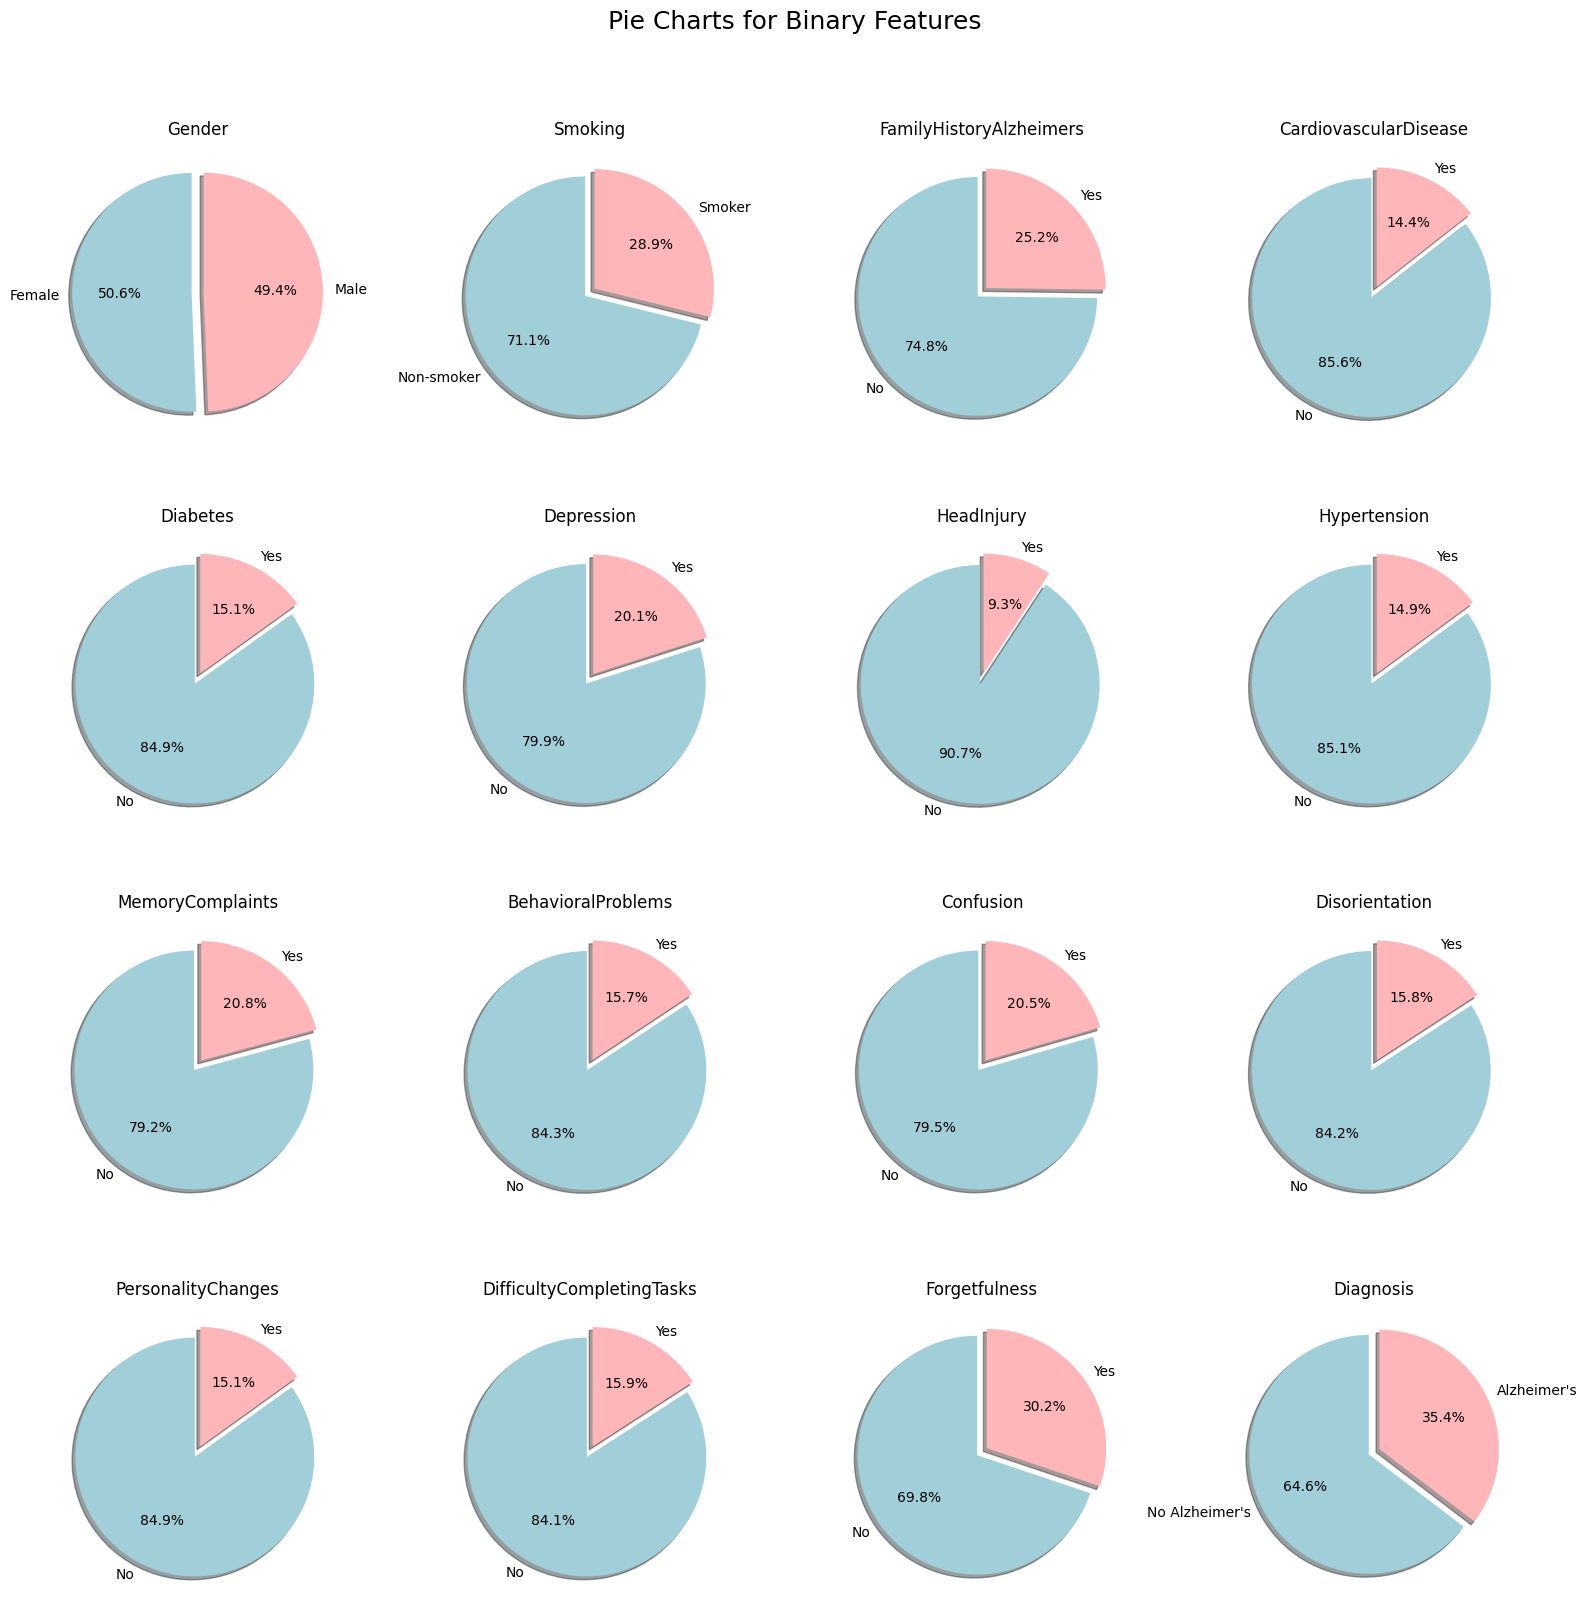

In [ ]:
# Binary features to visualize

binary_features = [
    'Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
    'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation',
    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness',
    'Diagnosis'
]

plt.figure(figsize=(16, 16))
plt.suptitle("Pie Charts for Binary Features", fontsize=18, y=1.02)

colors = ['#A0CED9', '#FFB6B9']

for i, feature in enumerate(binary_features, 1):
    plt.subplot(4, 4, i)
    counts = df_vis[feature].value_counts()
    explode = [0.05] * len(counts)

    plt.pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        explode=explode,
        colors=colors[:len(counts)]
    )
    plt.title(feature, fontsize=12)

plt.tight_layout()
plt.show()

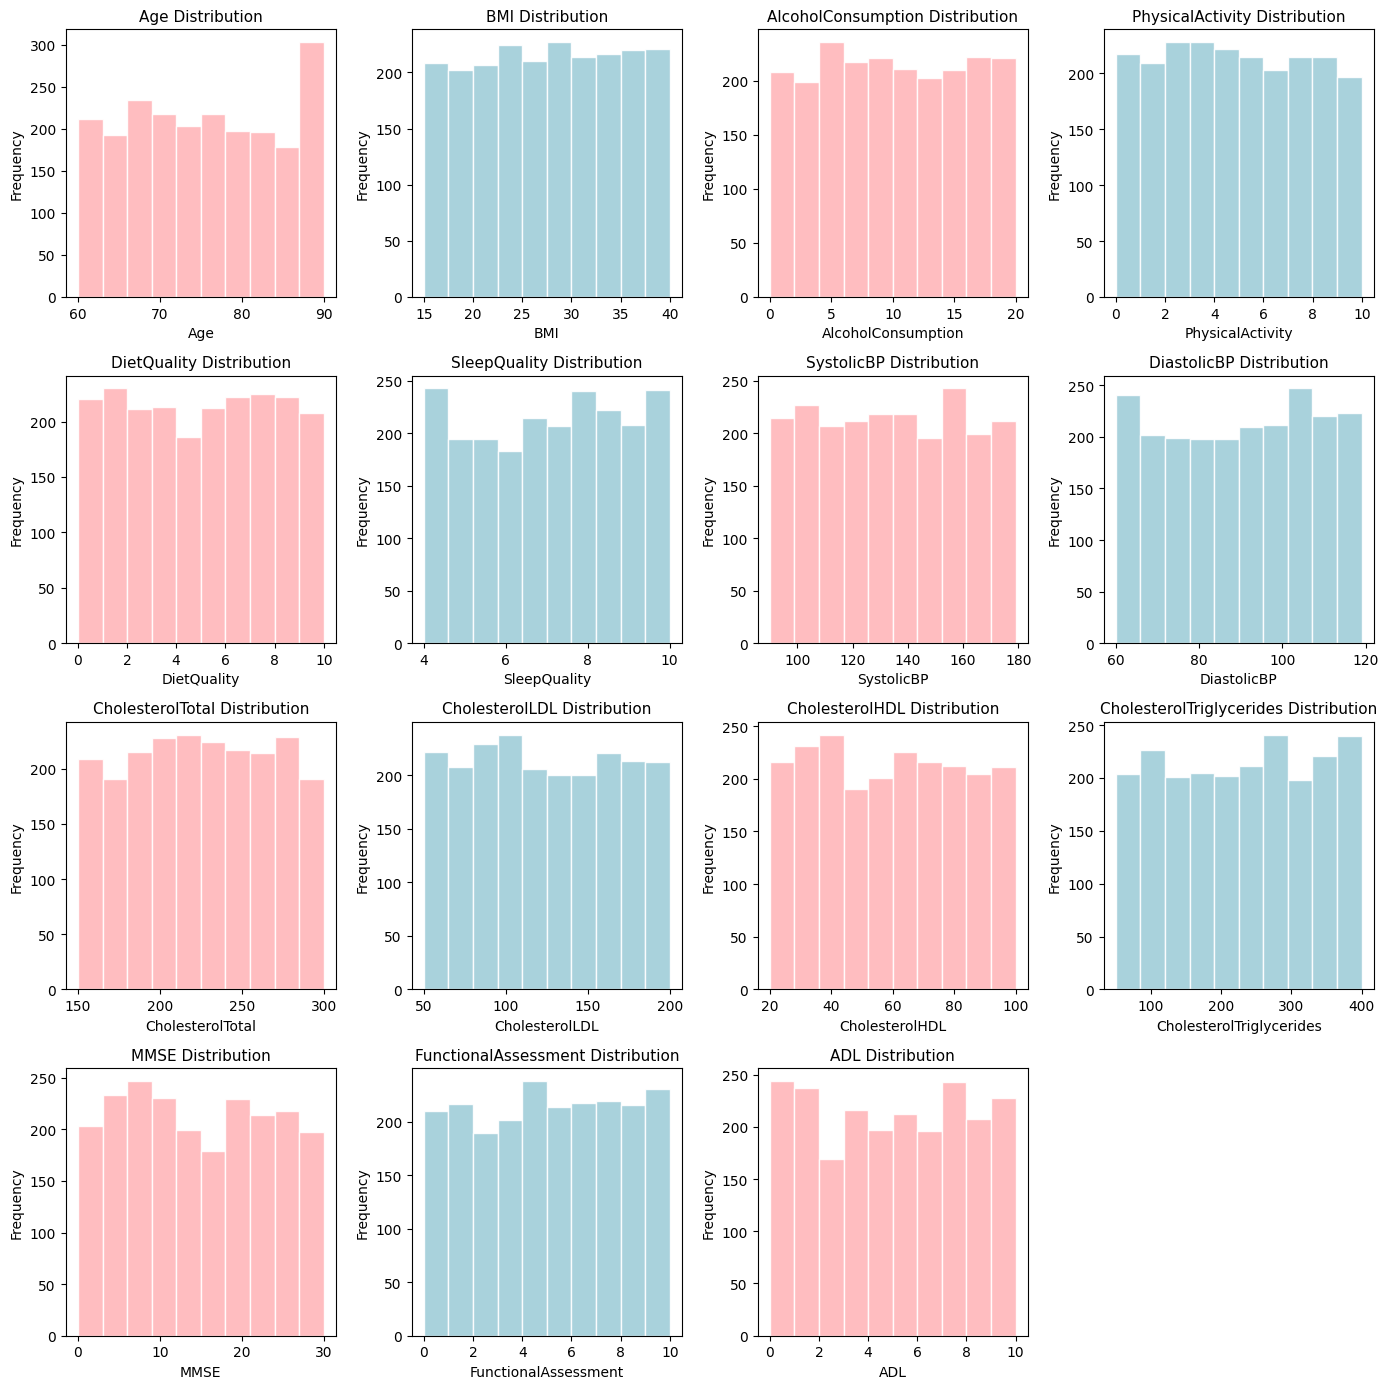

In [ ]:
# Numeric features to visualize
numeric_features = [
    'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
    'SleepQuality', 'SystolicBP', 'DiastolicBP',
    'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
    'MMSE', 'FunctionalAssessment', 'ADL'
]

plt.figure(figsize=(14, 14))
colors = ['#A0CED9', '#FFB6B9']

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(4, 4, i)
    plt.hist(
        df_vis[feature],
        bins=10,
        edgecolor='white',
        alpha=0.9,
        color=colors[i % 2]
    )
    plt.title(f'{feature} Distribution', fontsize=11)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Most variables show **uniform or near-uniform** distributions, meaning the data is good and there are no unusually dominant value categories (with the exception of the Age peak). These distributions are generally **good for modeling**, as they provide sufficient variety across all ranges of the variables.

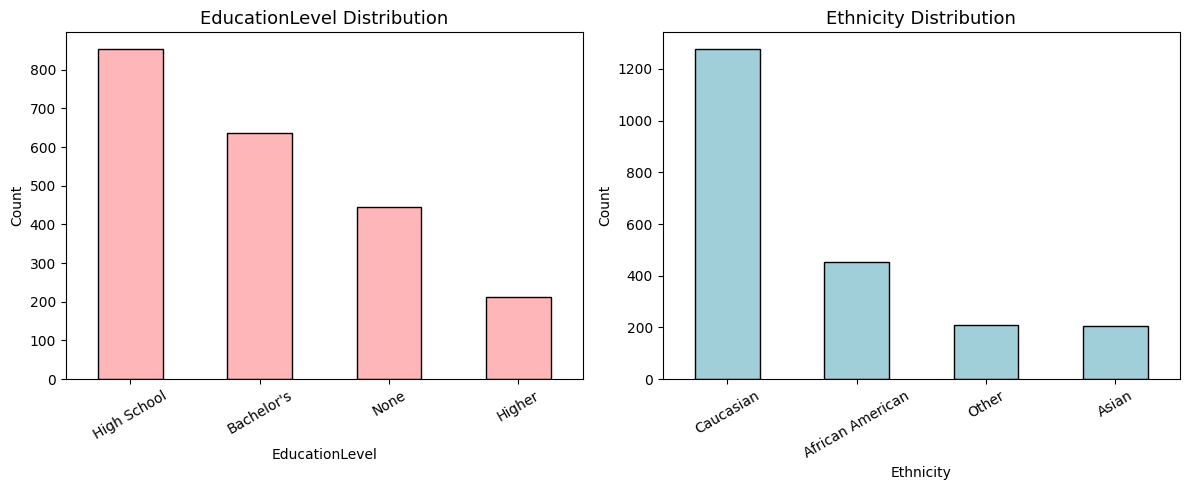

In [ ]:
# Bar plots for multi-category features
bar_features = ['EducationLevel', 'Ethnicity']

plt.figure(figsize=(12, 5))
colors = ['#A0CED9', '#FFB6B9']

for i, feature in enumerate(bar_features, 1):
    plt.subplot(1, 2, i)
    df_vis[feature].value_counts().plot(
        kind='bar',
        color=colors[i % 2],
        edgecolor='black'
    )
    plt.title(f'{feature} Distribution', fontsize=13)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

## Bivariate Analysis

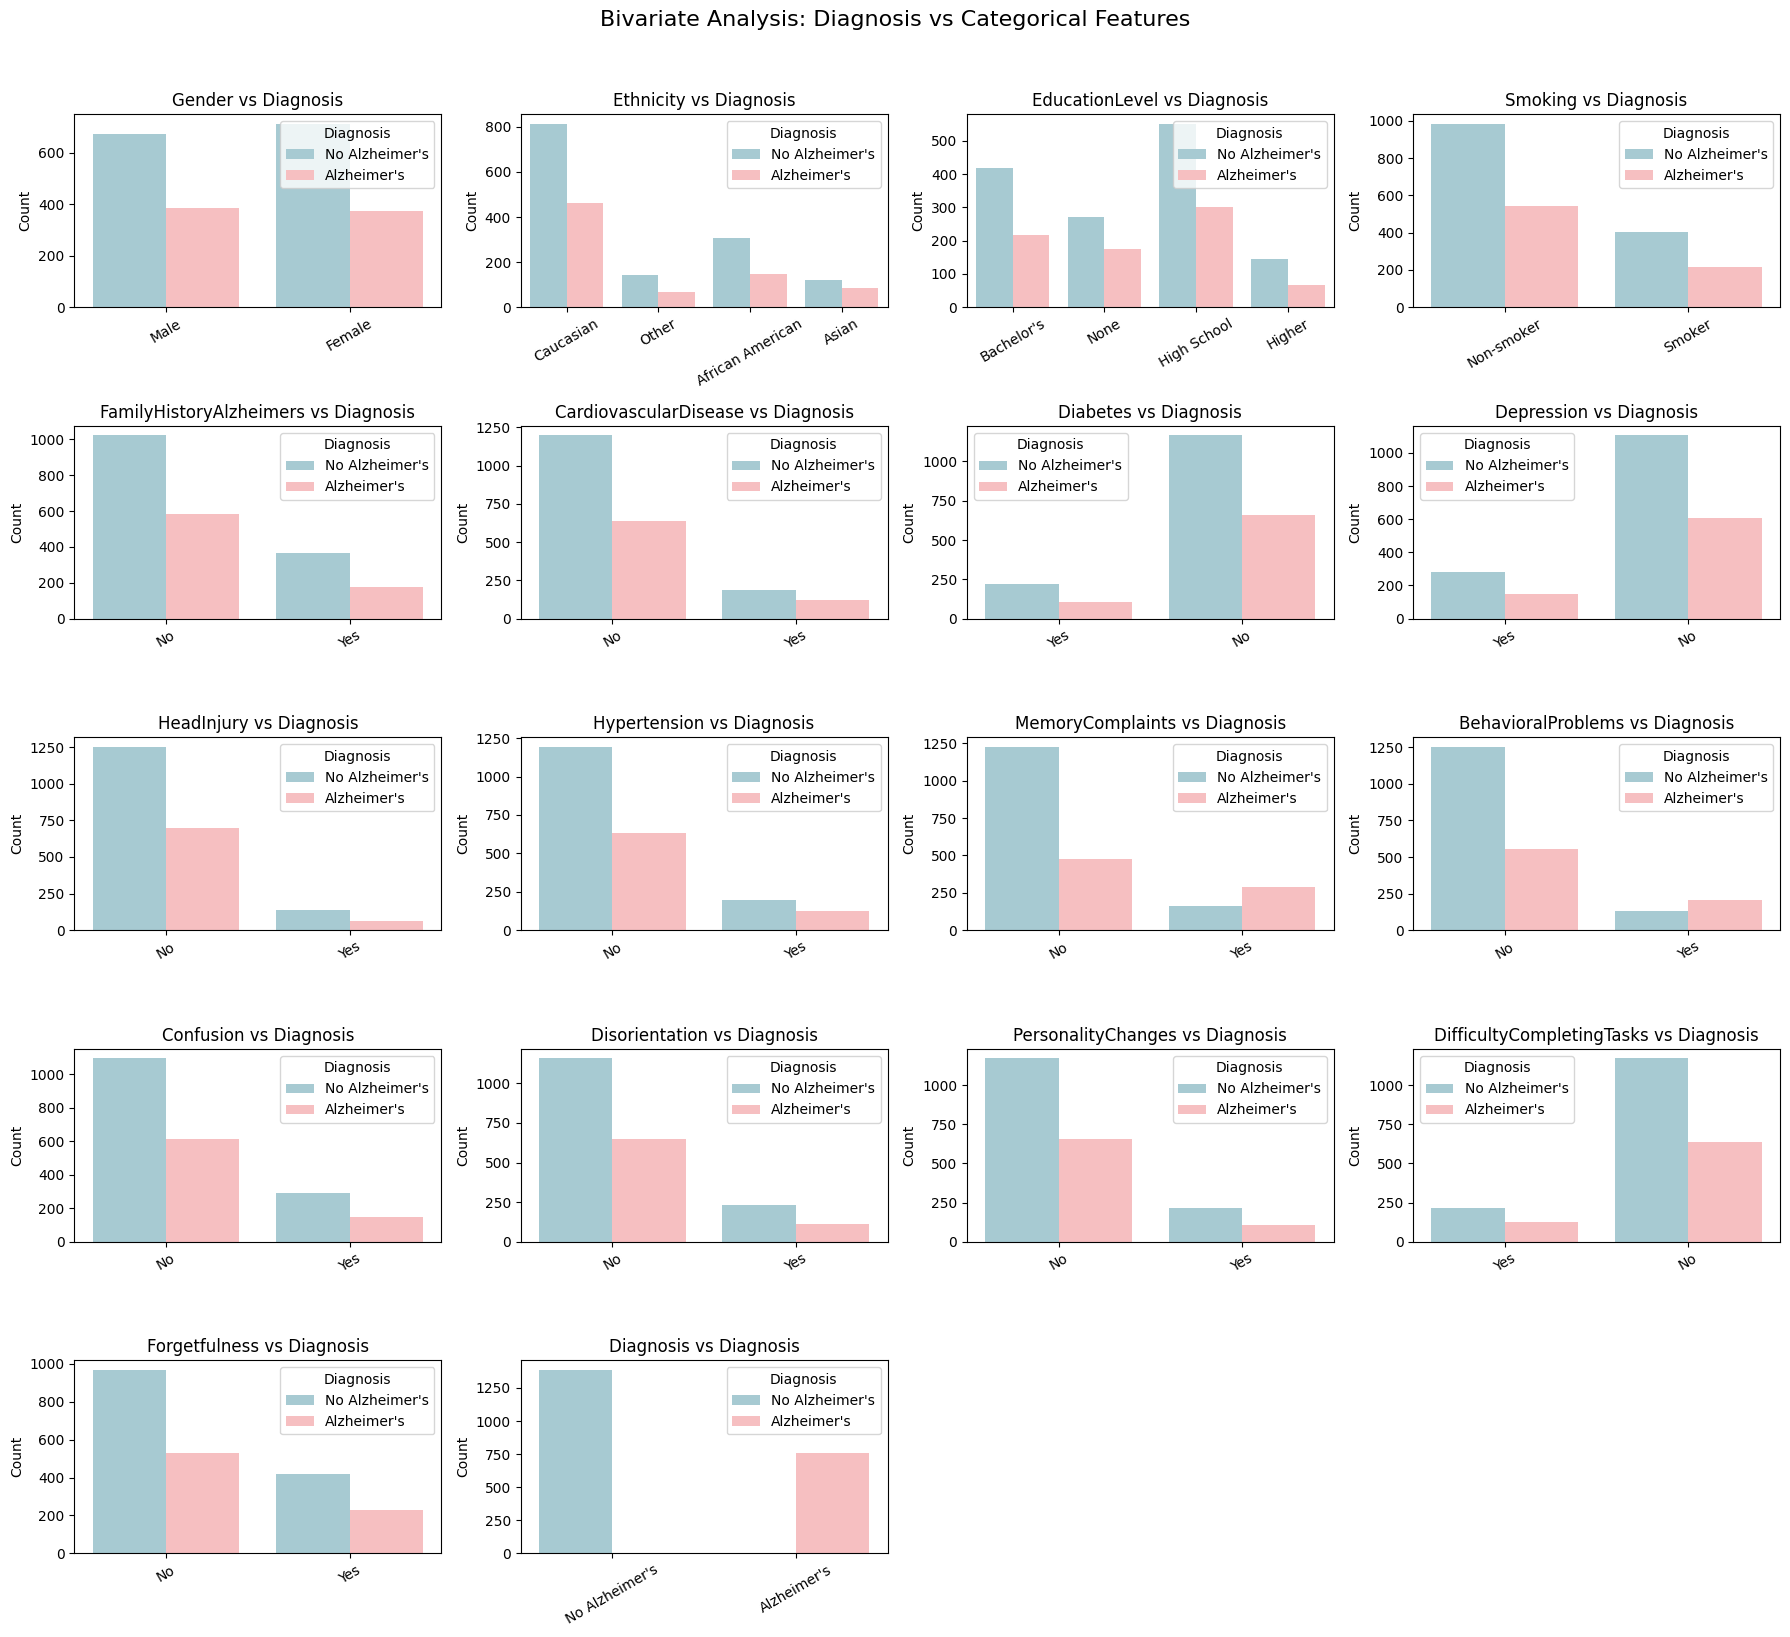

In [ ]:
# Diagnosis vs Categorical Features
categorical_features = df_vis.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(18, 16))
plt.suptitle("Bivariate Analysis: Diagnosis vs Categorical Features", fontsize=16, y=1.02)

n_cols = 4
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df_vis, x=feature, hue='Diagnosis',
                  palette=['#A0CED9', '#FFB6B9'])
    plt.title(f'{feature} vs Diagnosis', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=["No Alzheimer's", "Alzheimer's"])
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

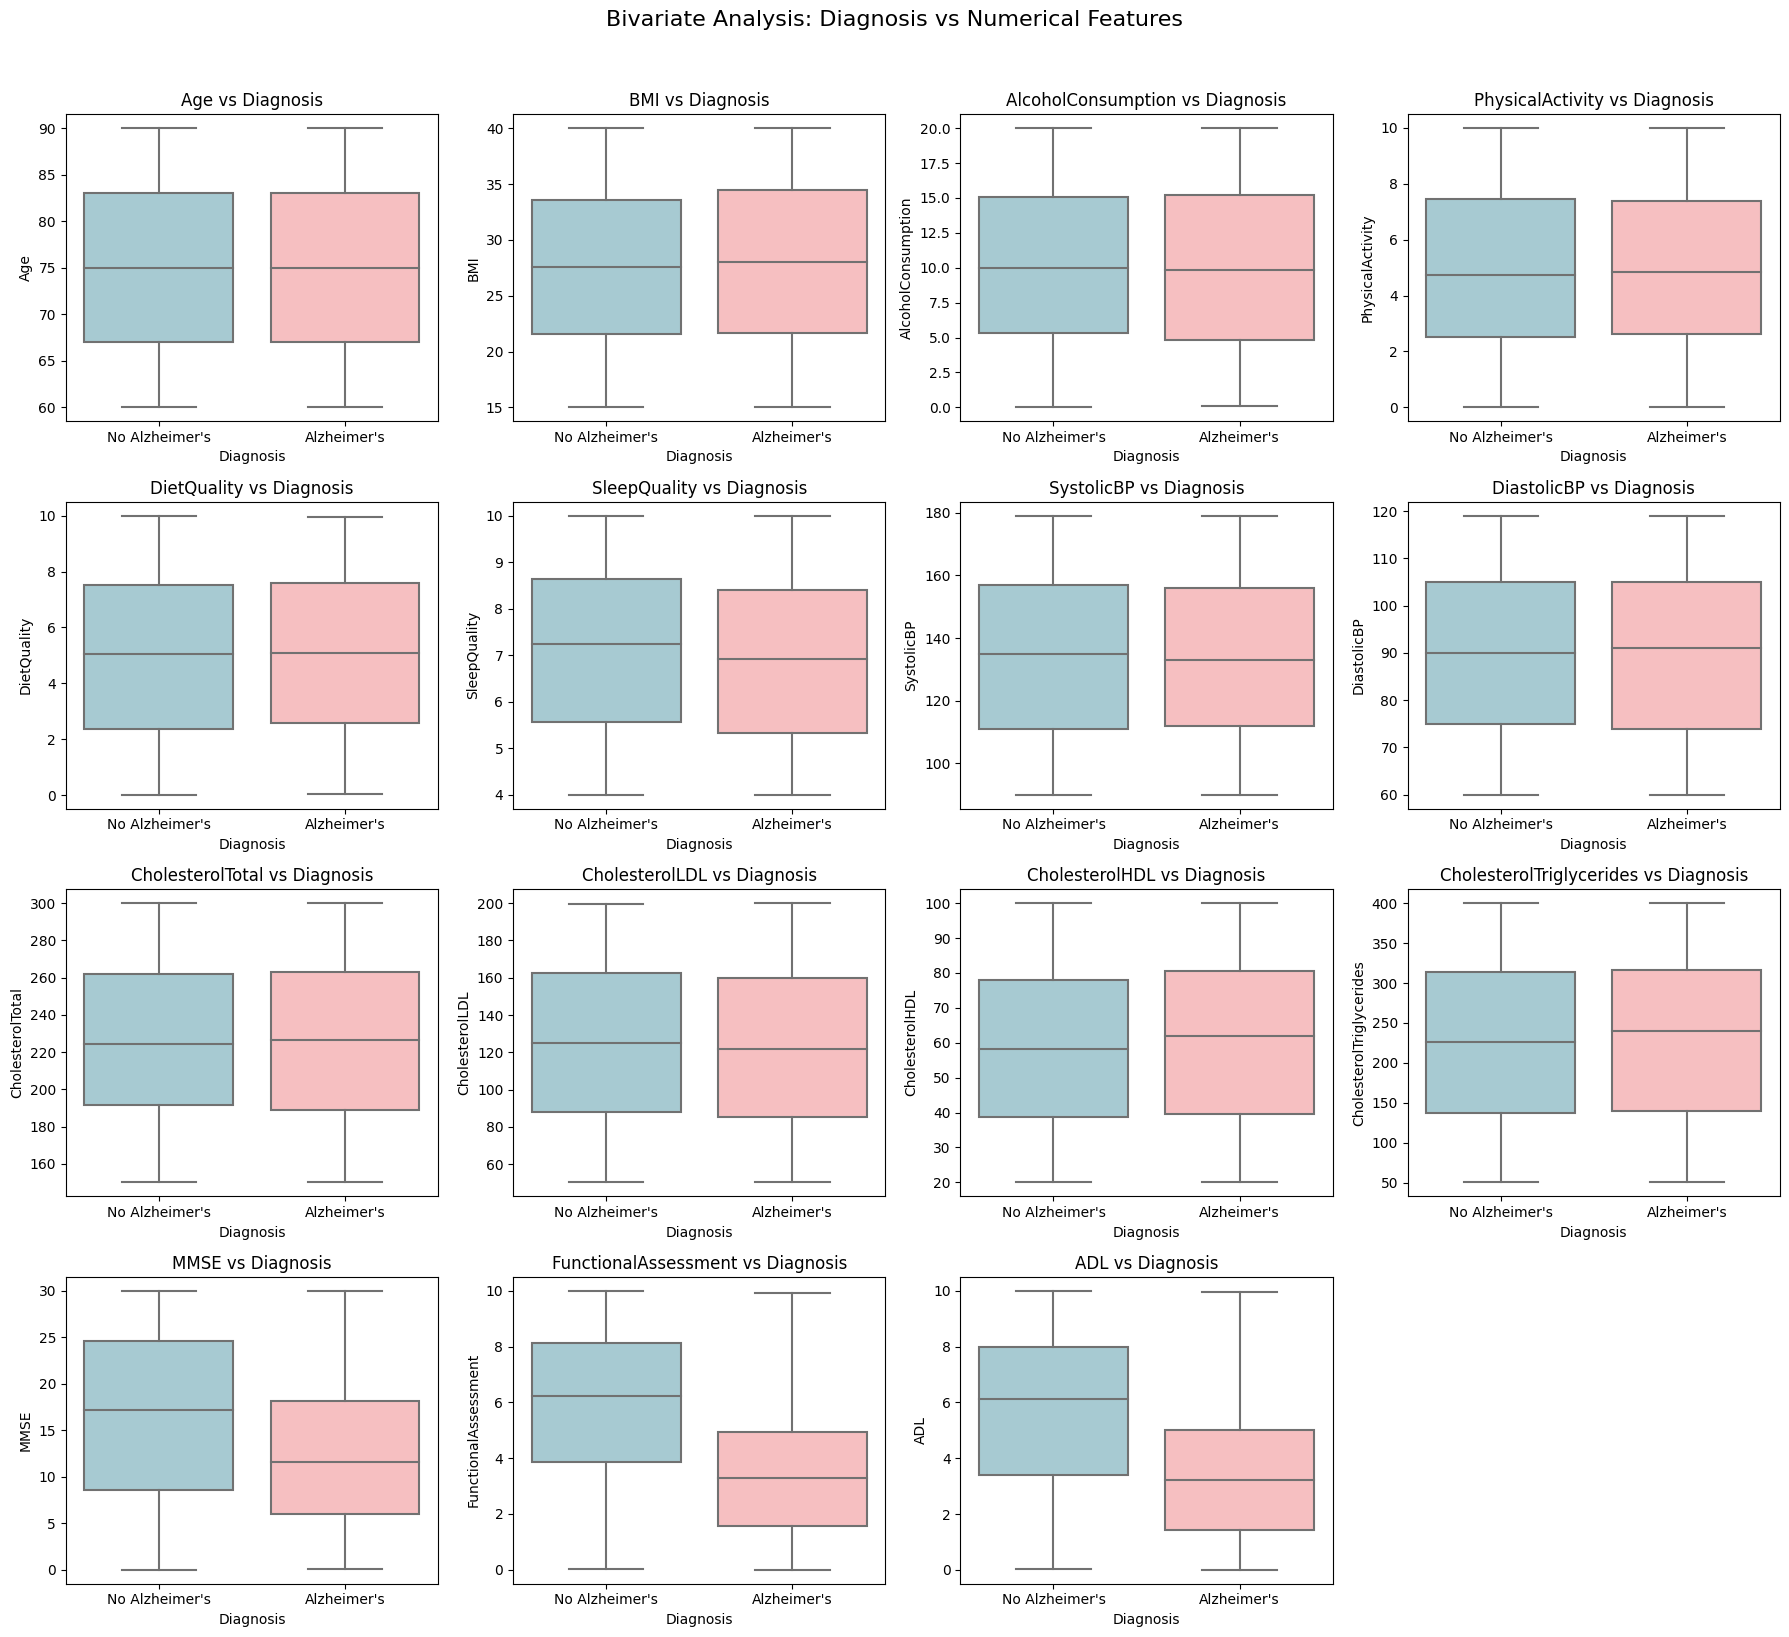

In [ ]:
# Diagnosis vs Numerical Features
numeric_features = df_vis.select_dtypes(include=['int64', 'float64']).columns.tolist()

numeric_features = [col for col in numeric_features if col != 'Diagnosis']

plt.figure(figsize=(18, 16))
plt.suptitle("Bivariate Analysis: Diagnosis vs Numerical Features", fontsize=16, y=1.02)

n_cols = 4
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df_vis, x='Diagnosis', y=feature,
                palette=['#A0CED9', '#FFB6B9'])
    plt.title(f'{feature} vs Diagnosis', fontsize=12)
    plt.xlabel('Diagnosis')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

> All three features (MMSE, FunctionalAssessment, ADL) show negative correlations — meaning the lower their values, the higher the probability of Alzheimer’s diagnosis.


## Multivariate Analysis: Correlation Heatmap

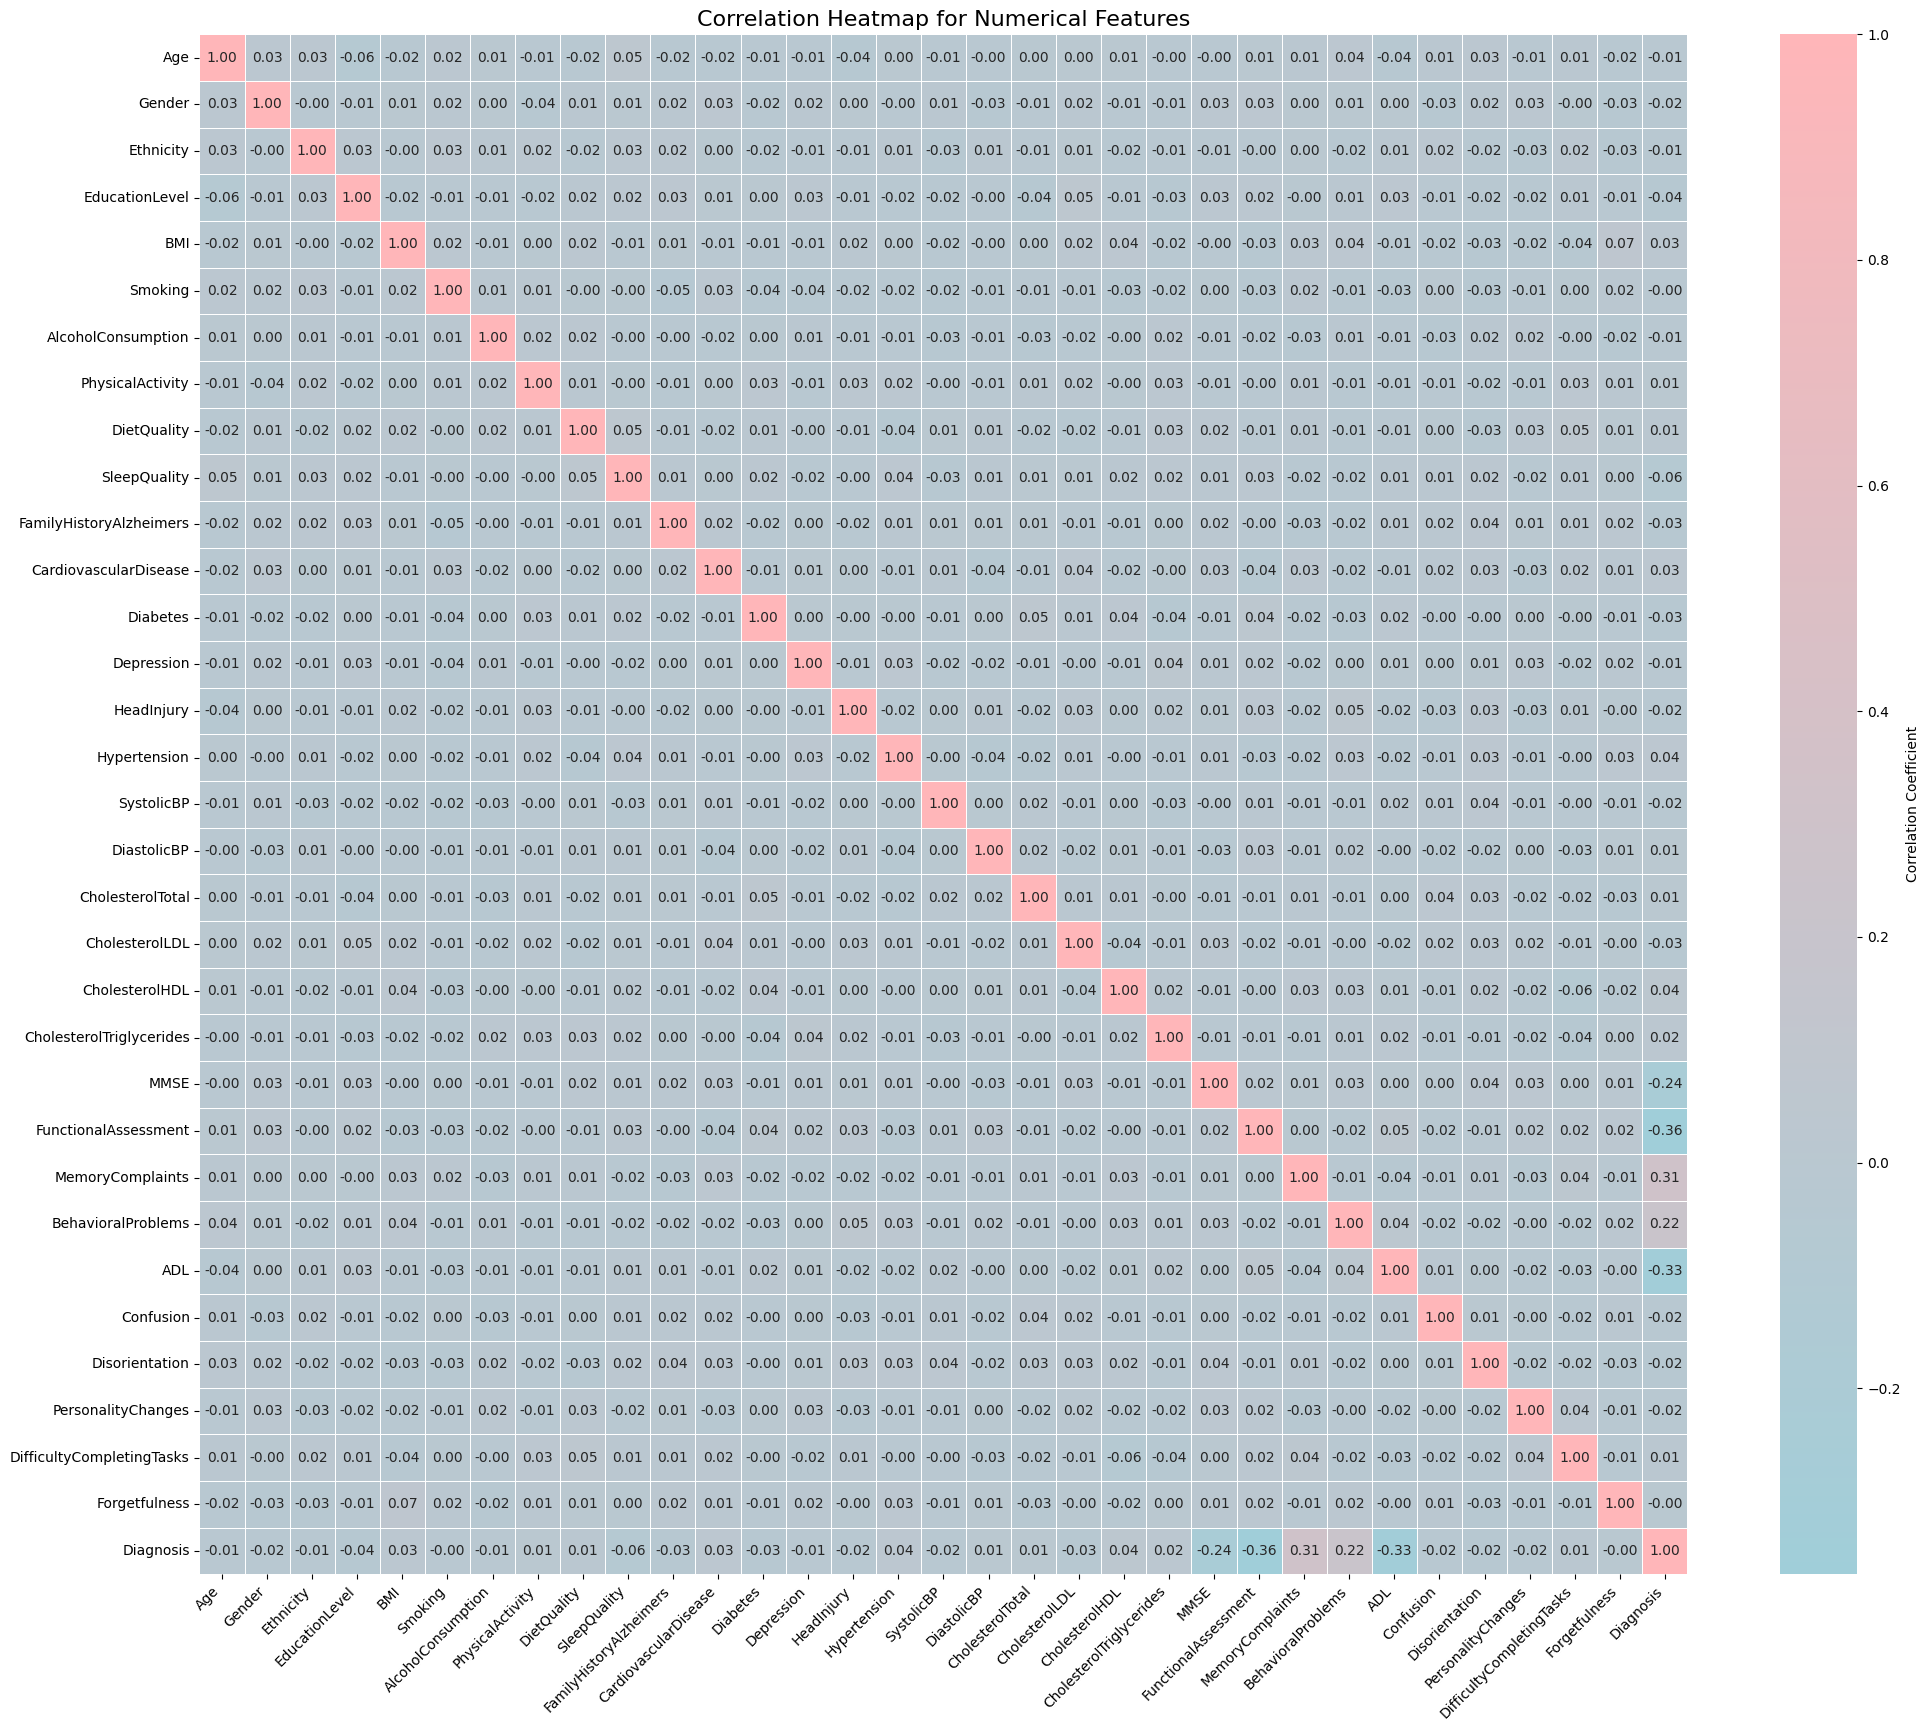

In [ ]:
# Create a custom colormap using the specified colors
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ['#A0CED9', '#FFB6B9'])

plt.figure(figsize=(24, 20))
sns.heatmap(
    df.corr(),
    cmap=custom_cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap for Numerical Features", fontsize=16)
plt.show()

## 🔹 Key Insights from the Correlation Matrix

### 🧠 Correlation with `Diagnosis`
> (Positive = increases likelihood of Alzheimer’s, Negative = decreases likelihood)

| Feature | Correlation with Diagnosis | Interpretation |
|----------|-----------------------------|----------------|
| **FunctionalAssessment** | **-0.36** | Lower functional performance → higher likelihood of Alzheimer’s. |
| **ADL (Activities of Daily Living)** | **-0.33** | Lower ability to perform daily activities → higher Alzheimer’s risk. |
| **MemoryComplaints** | **+0.31** | More memory complaints → higher likelihood of Alzheimer’s. |
| **BehavioralProblems** | **+0.22** | Behavioral issues are strongly associated with Alzheimer’s presence. |
| **MMSE** | **-0.24** | Lower cognitive test scores (MMSE) indicate Alzheimer’s. |
| **Hypertension** | **+0.04** | Very weak positive correlation — not significant. |
| **BMI, Age, Cholesterol, Smoking, Diabetes** | ~0.00–0.03 | Very weak or no correlation. |

📊 **Overall insight:**  
The strongest indicators of Alzheimer’s are **decreased cognitive and functional ability** and **increased memory or behavioral issues**.

---

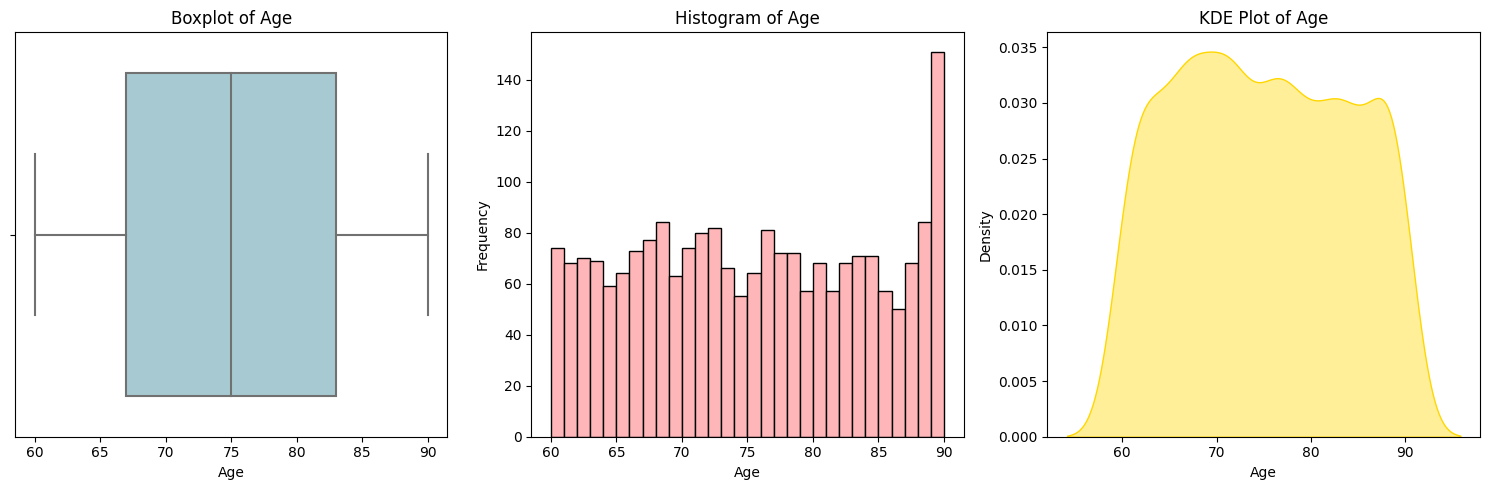

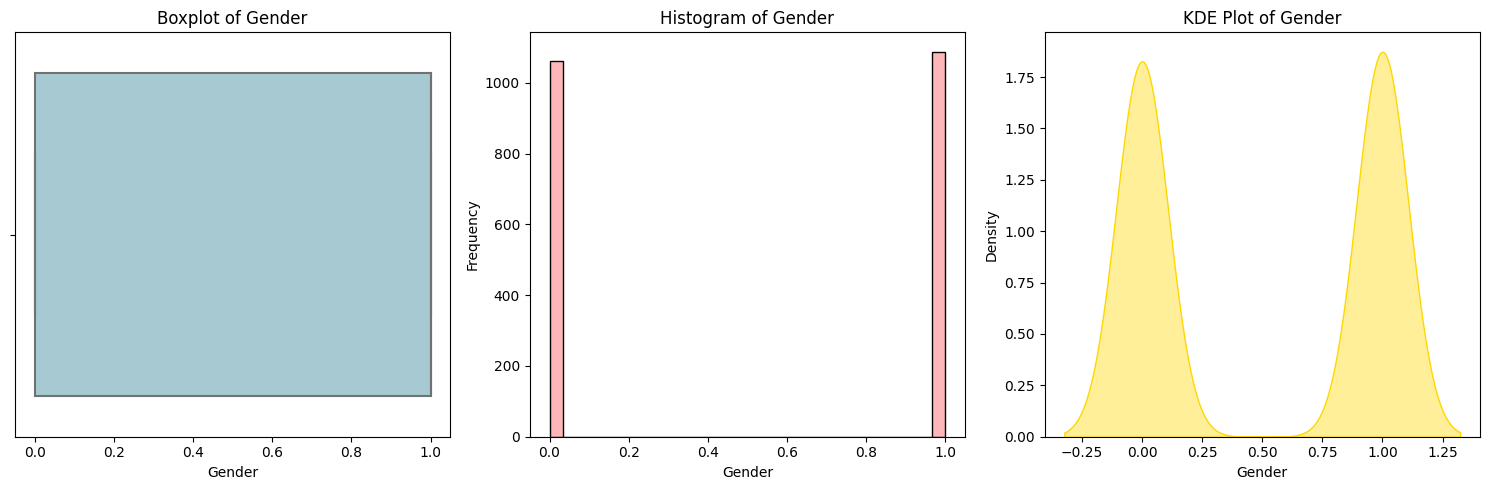

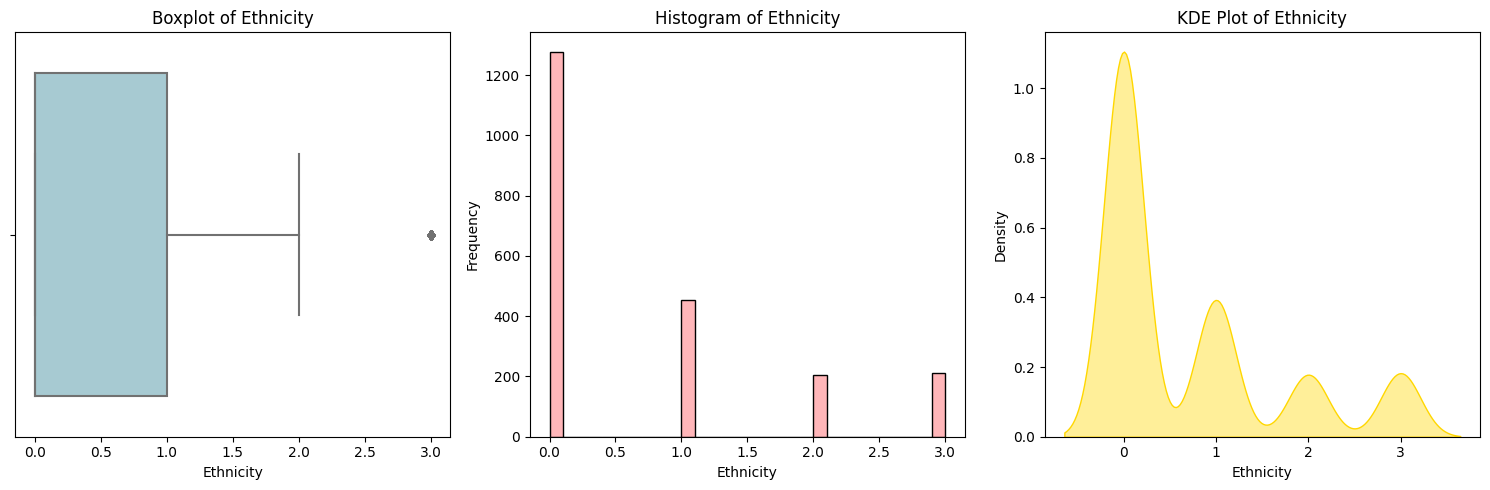

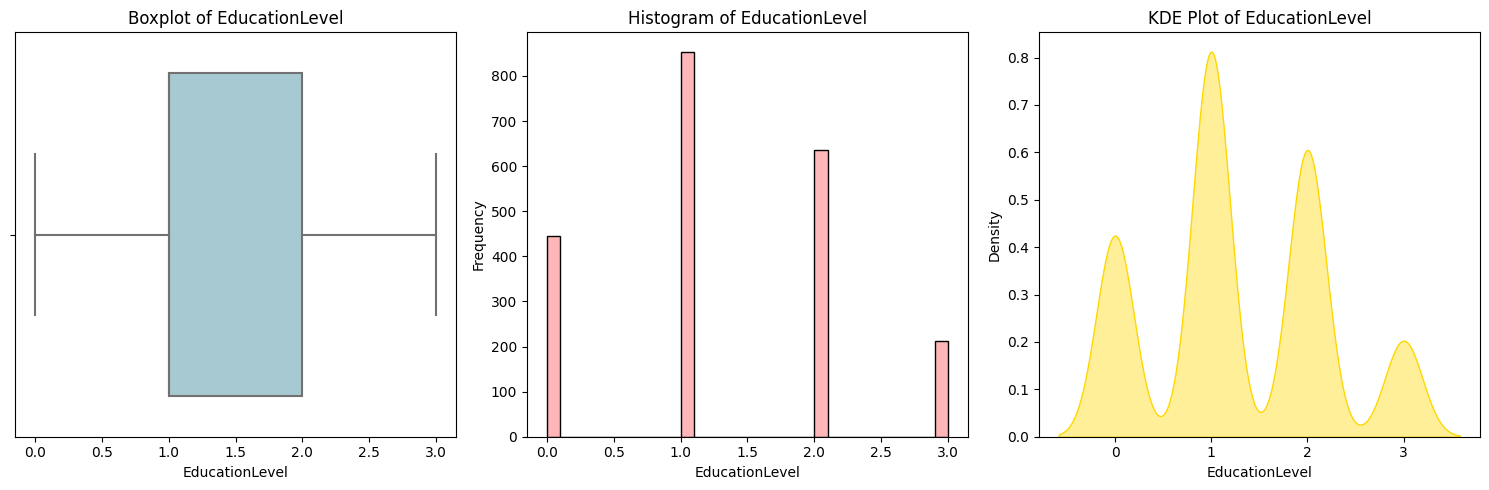

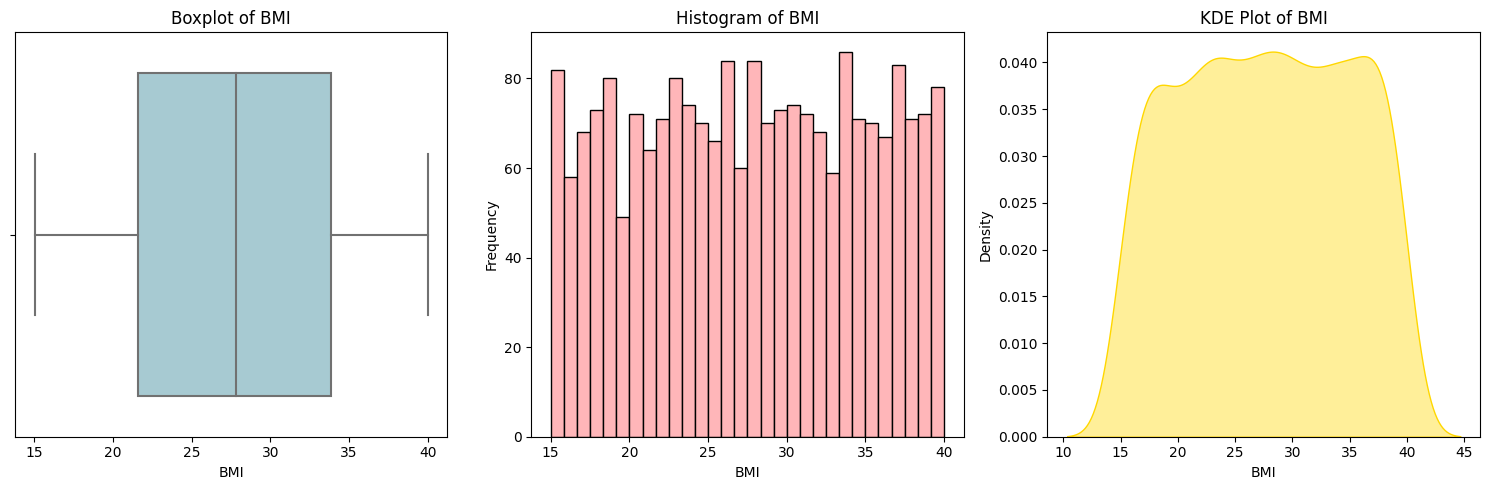

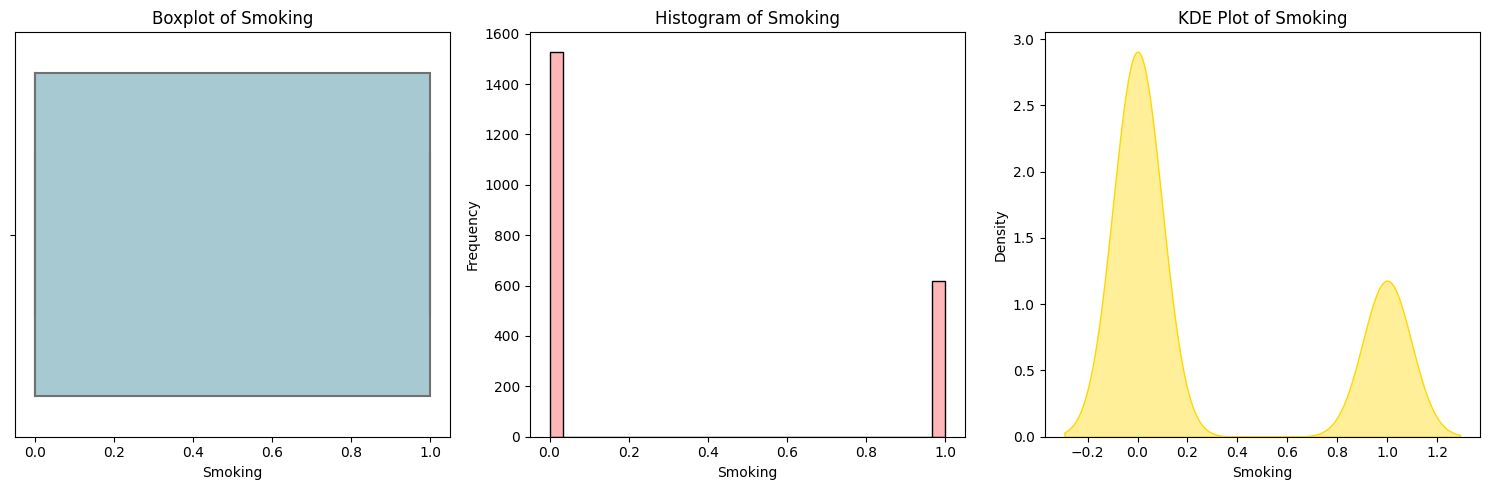

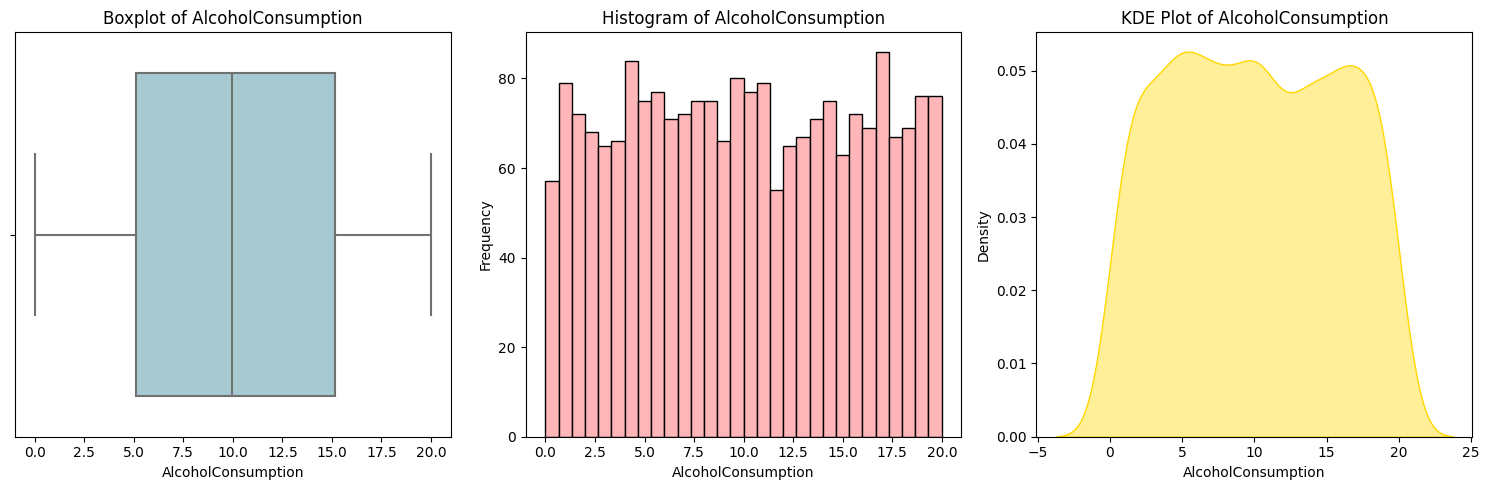

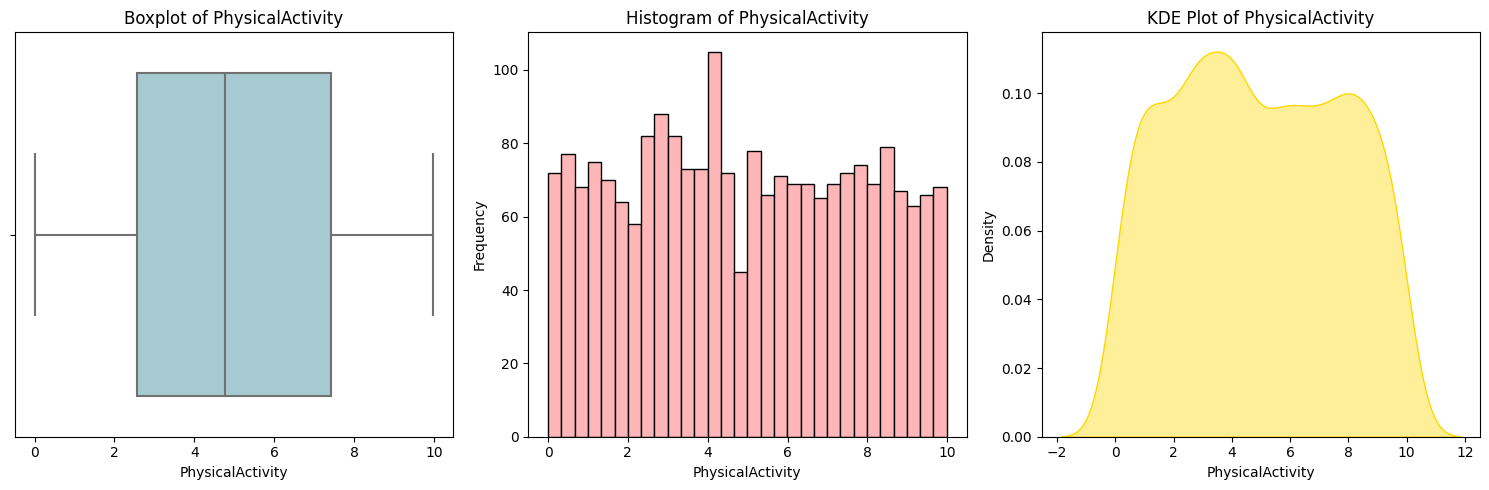

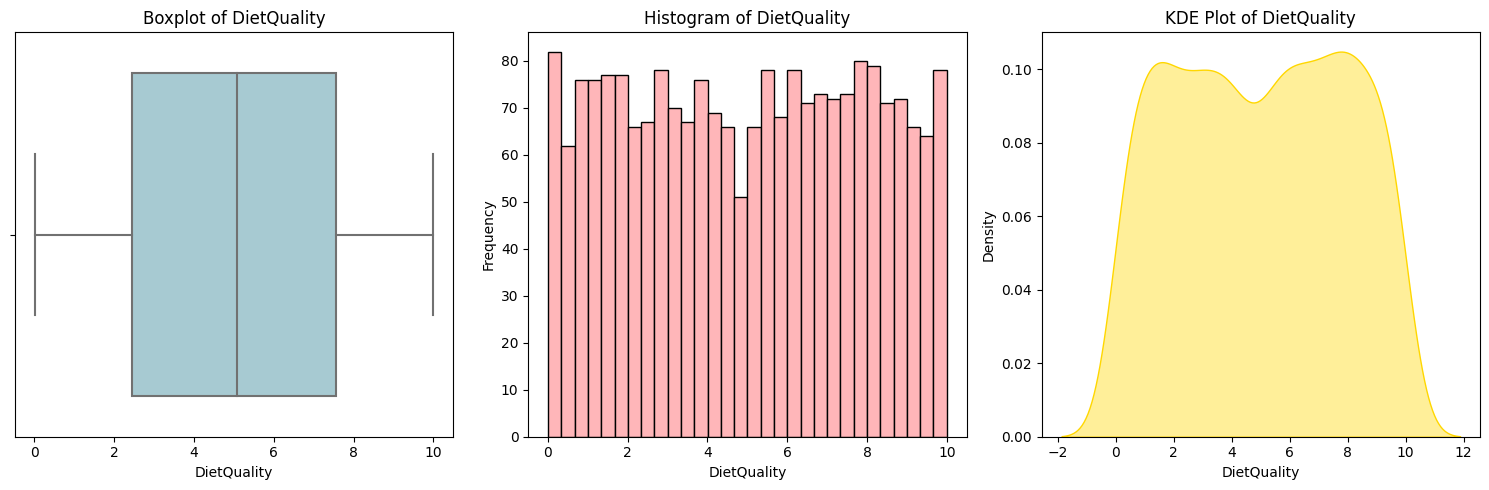

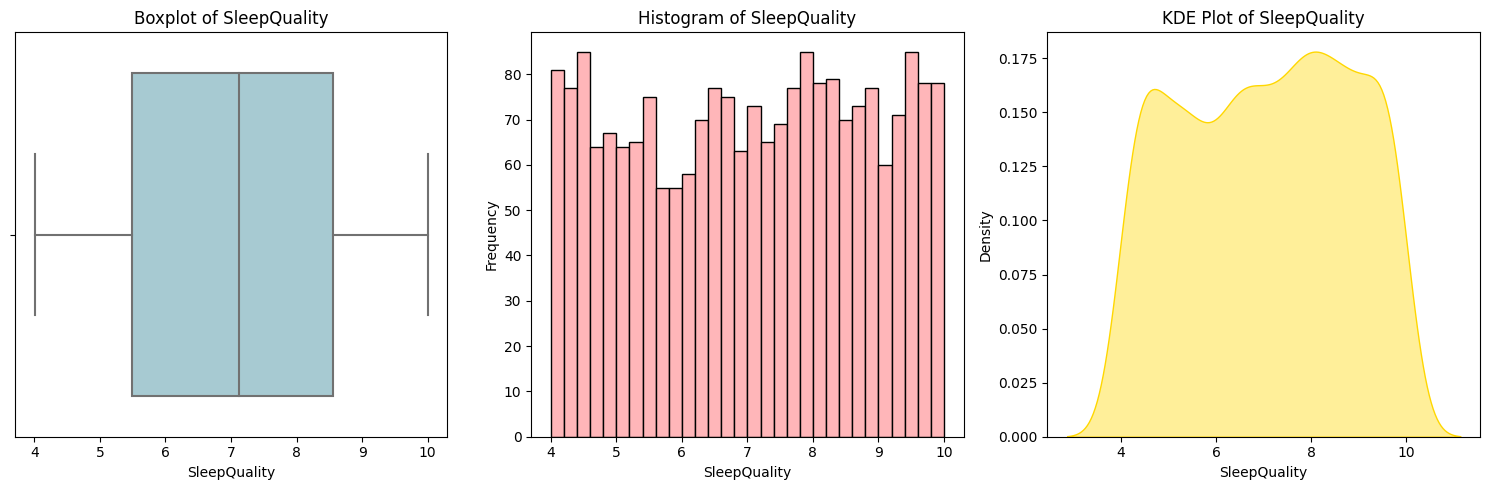

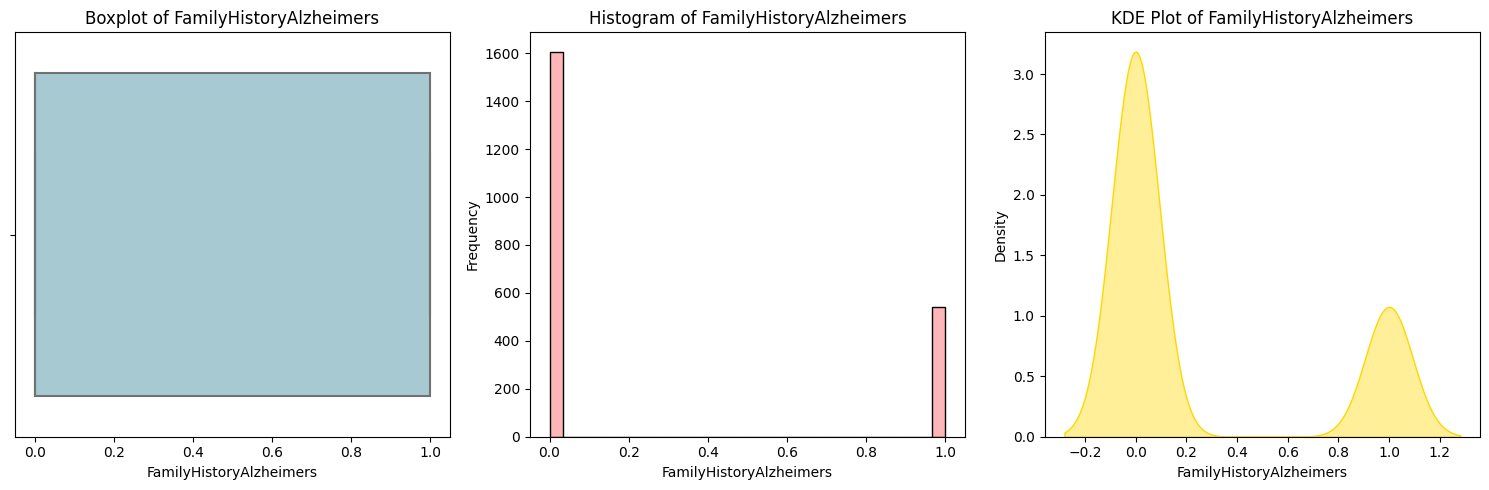

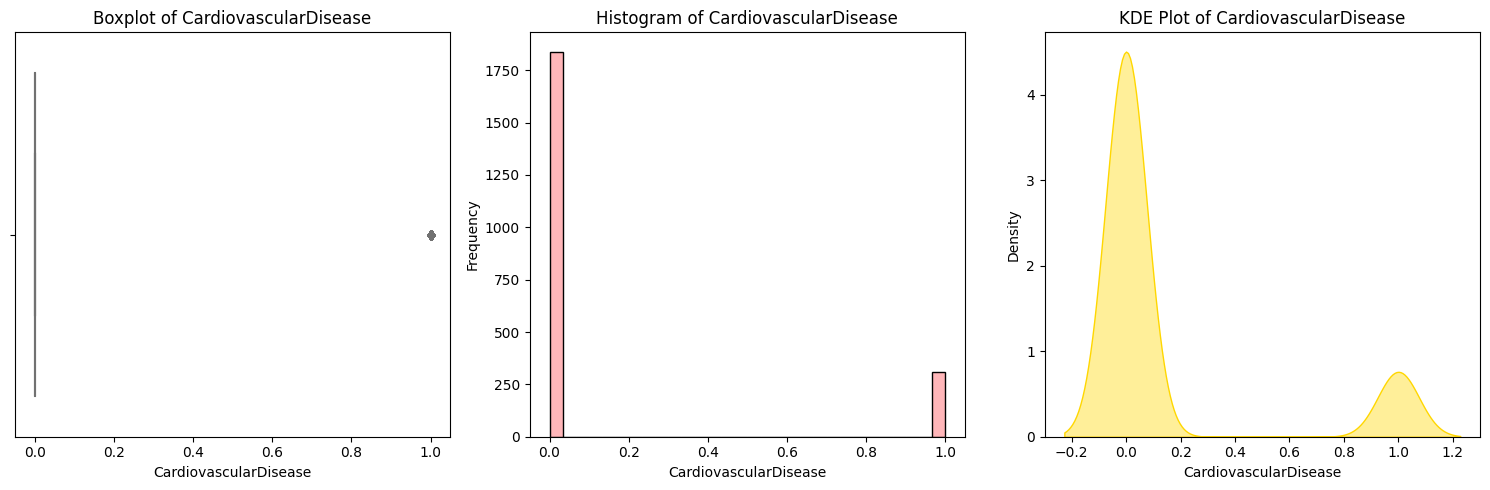

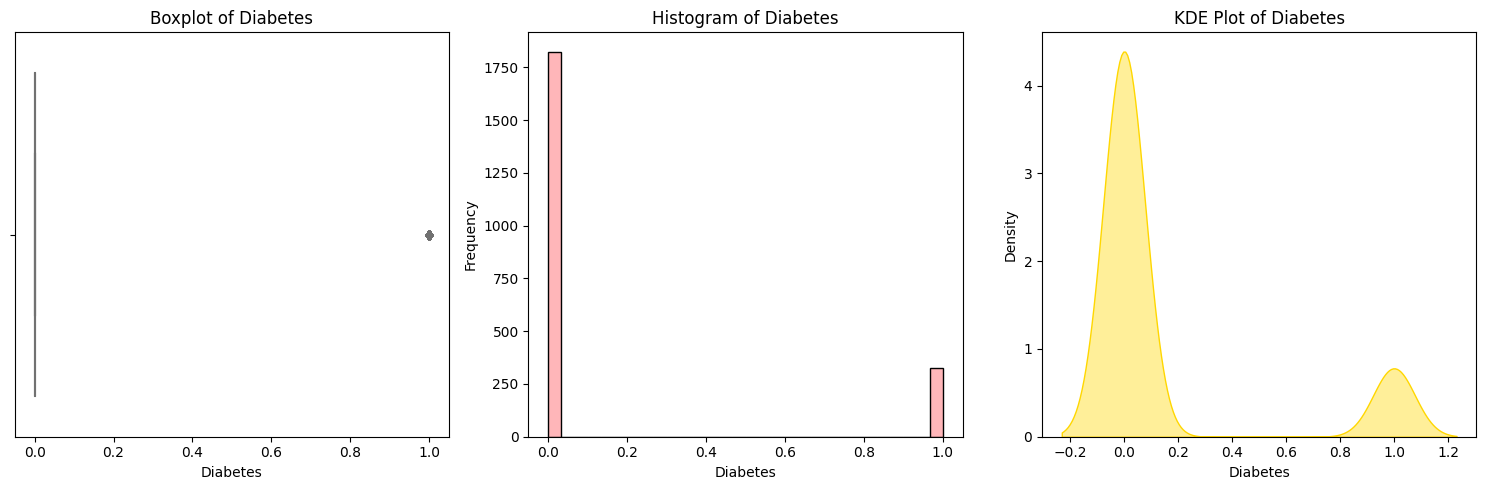

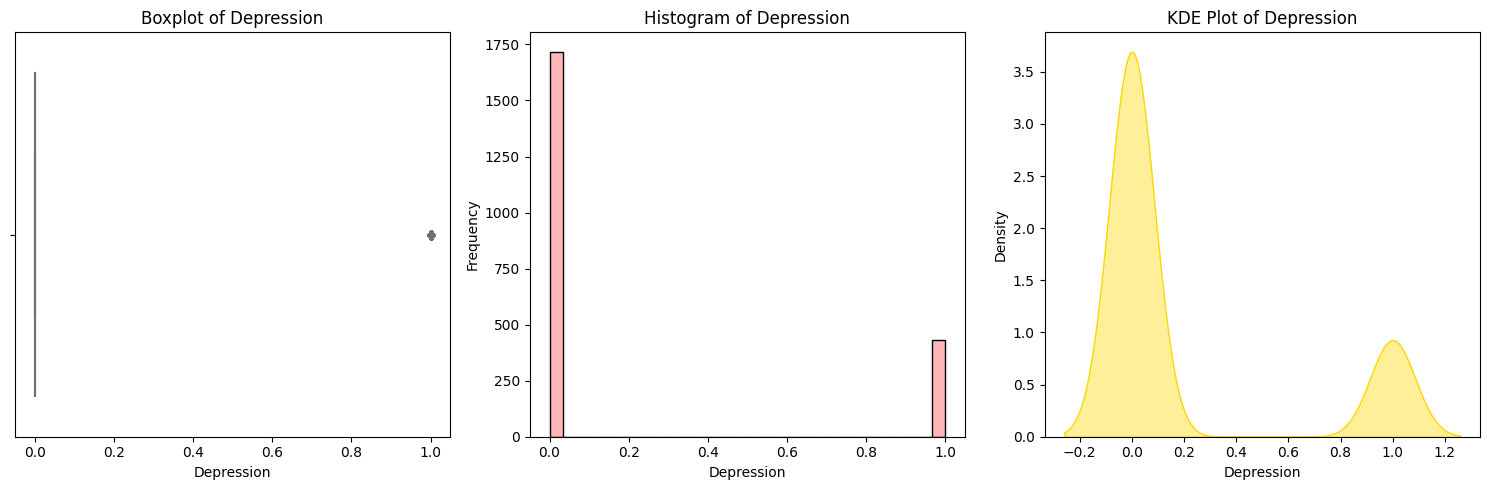

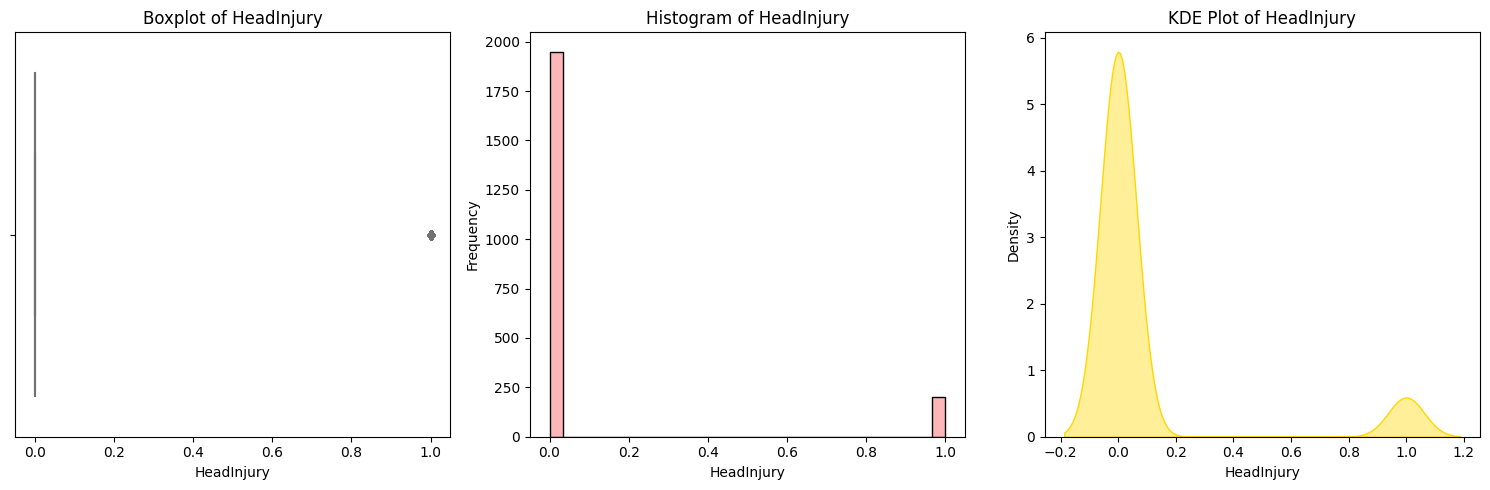

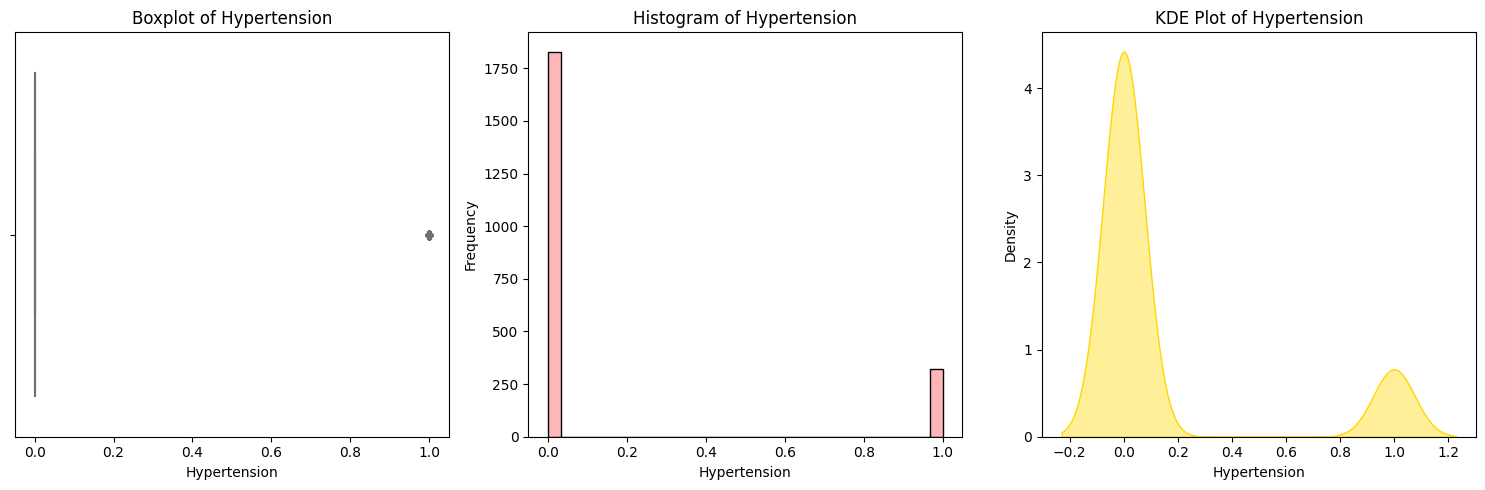

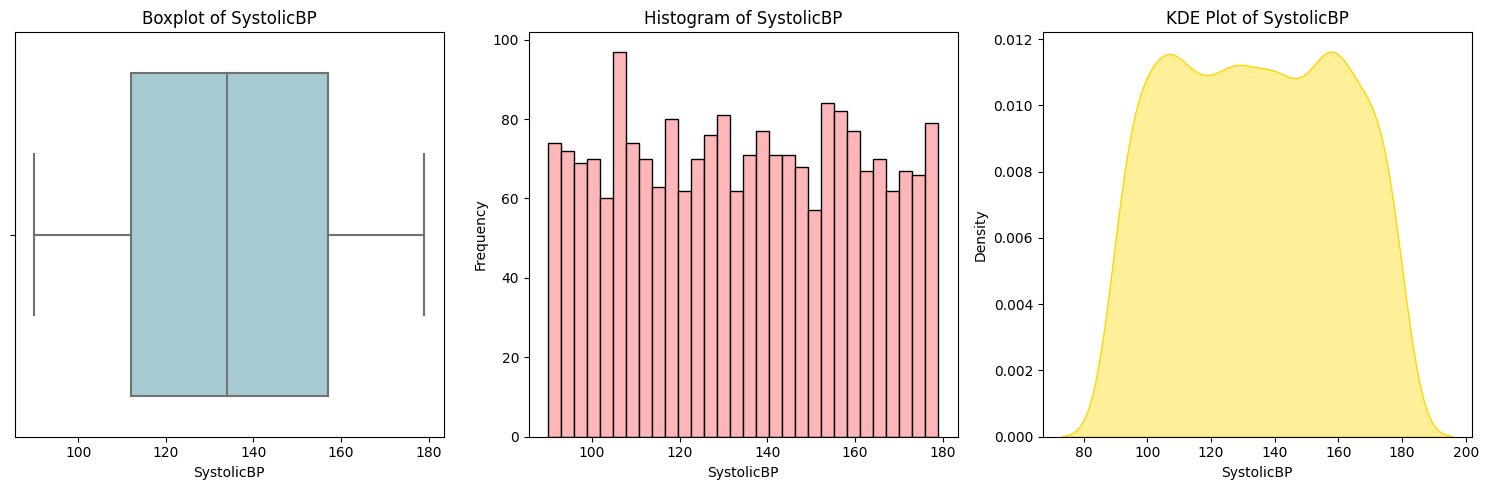

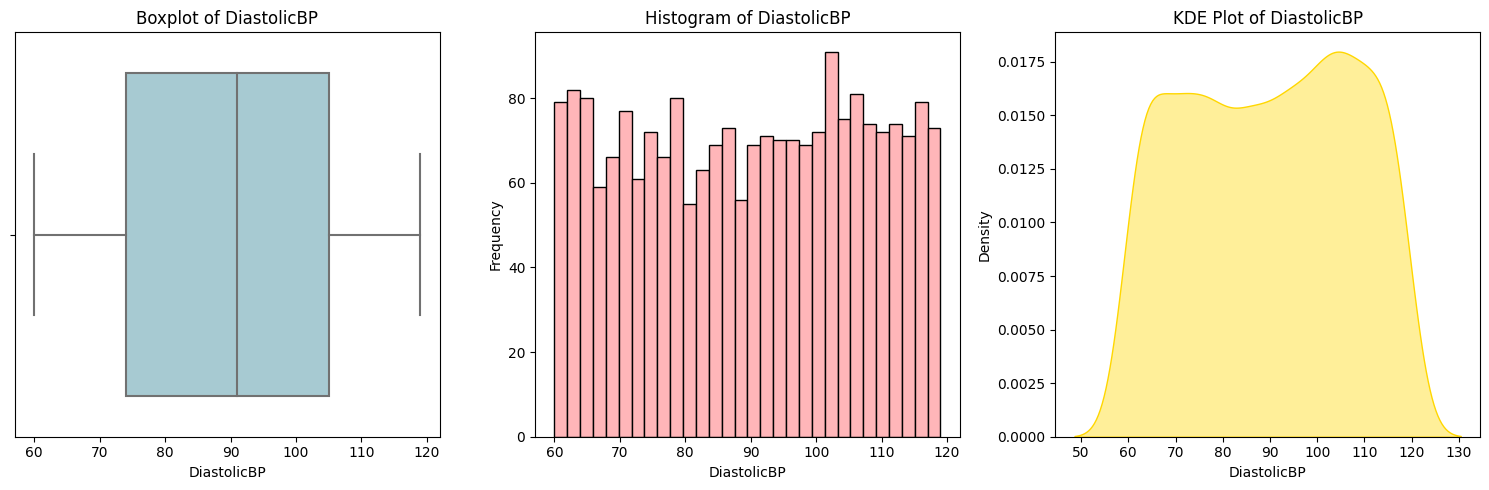

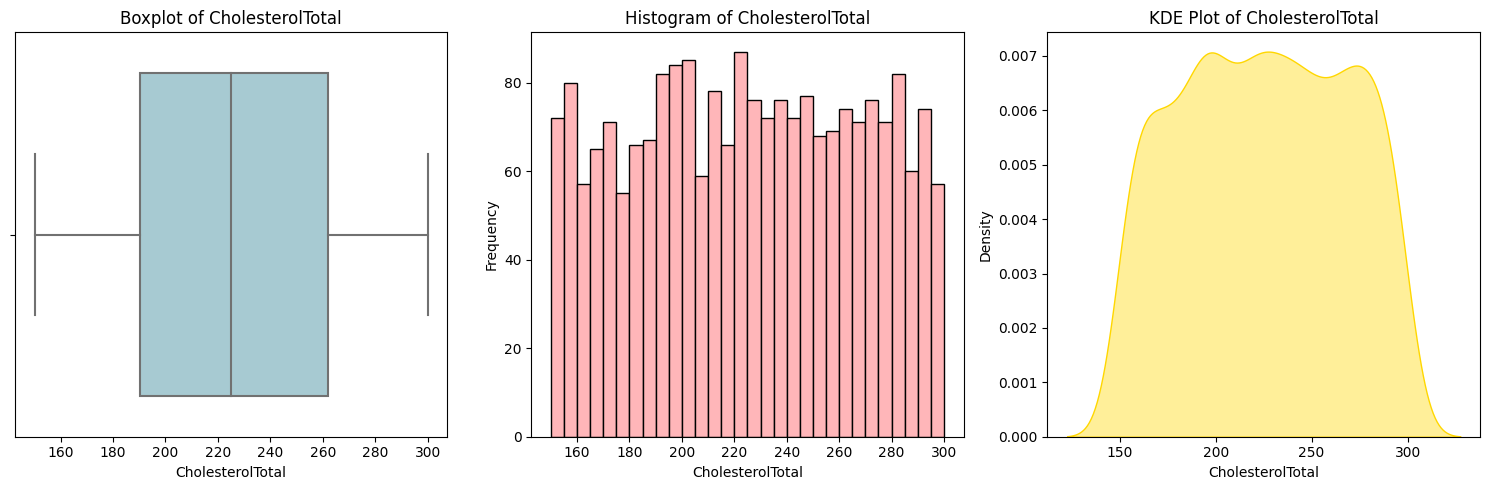

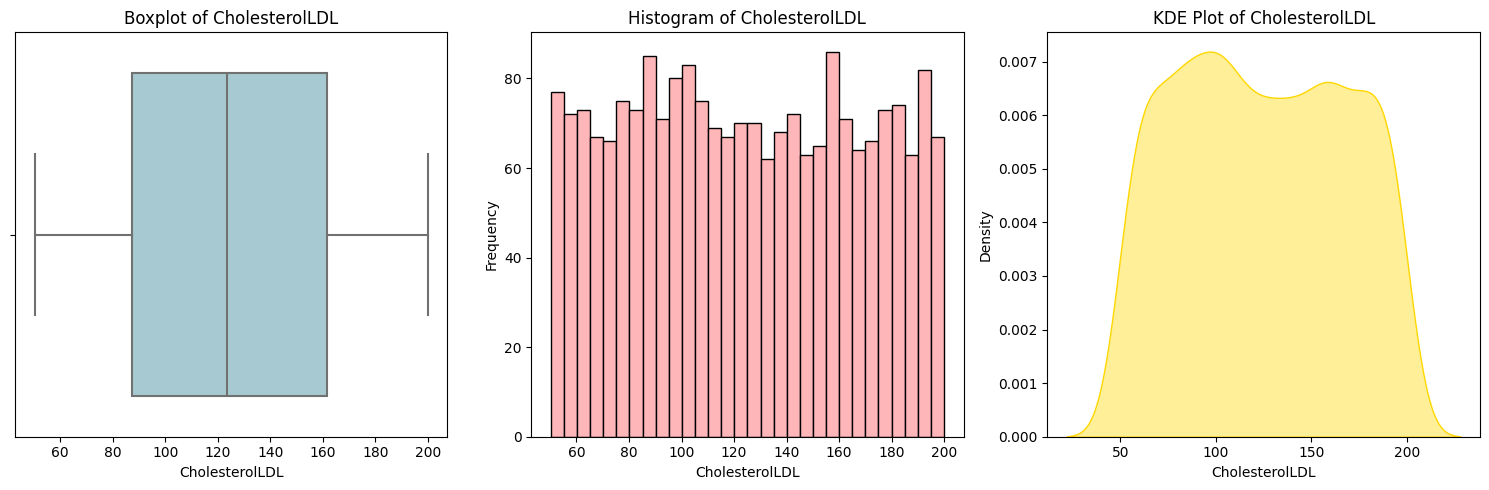

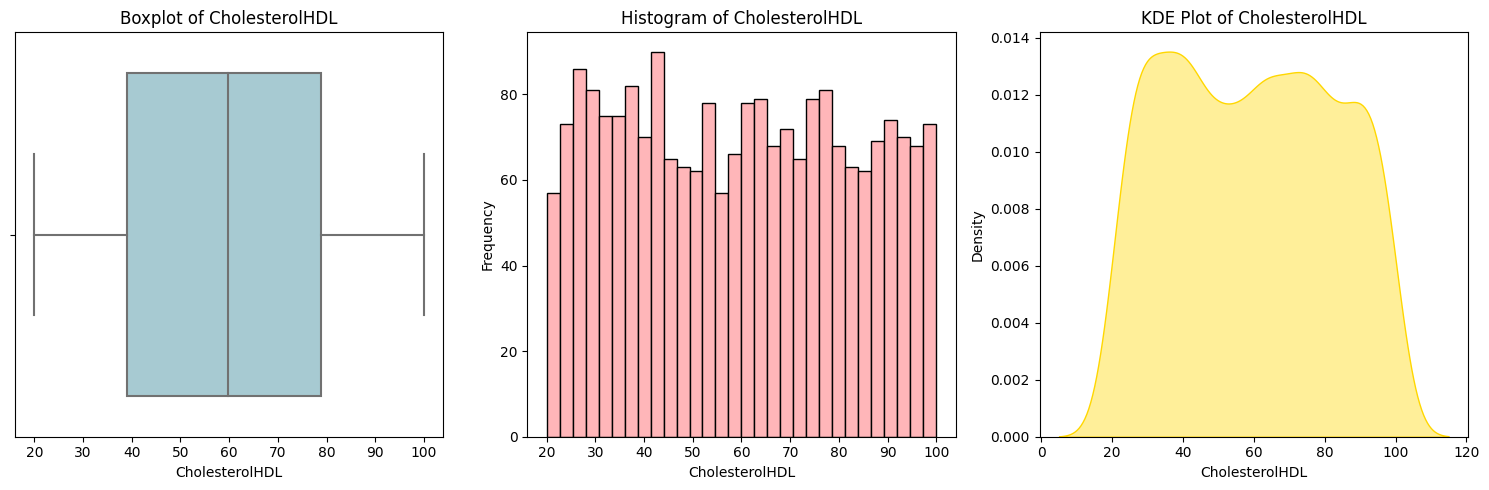

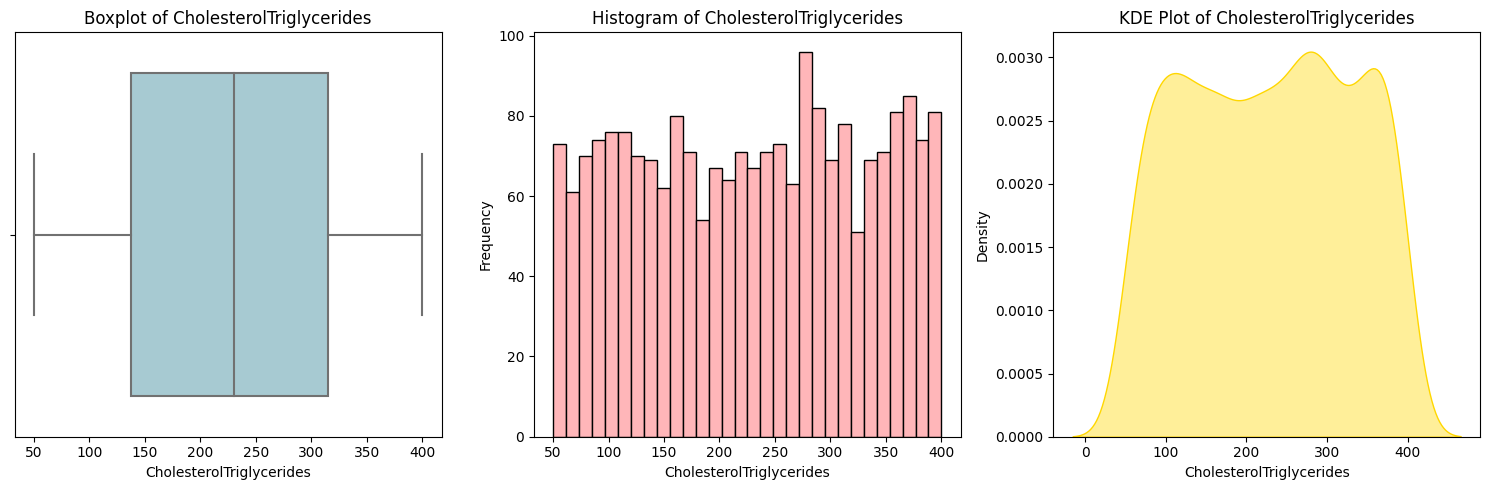

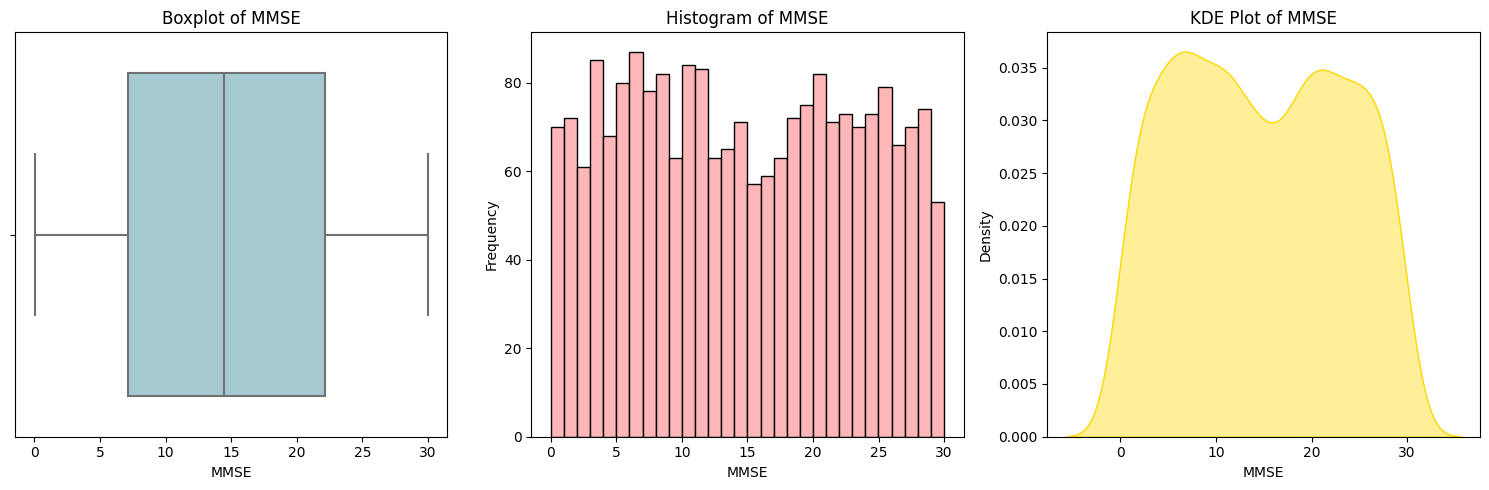

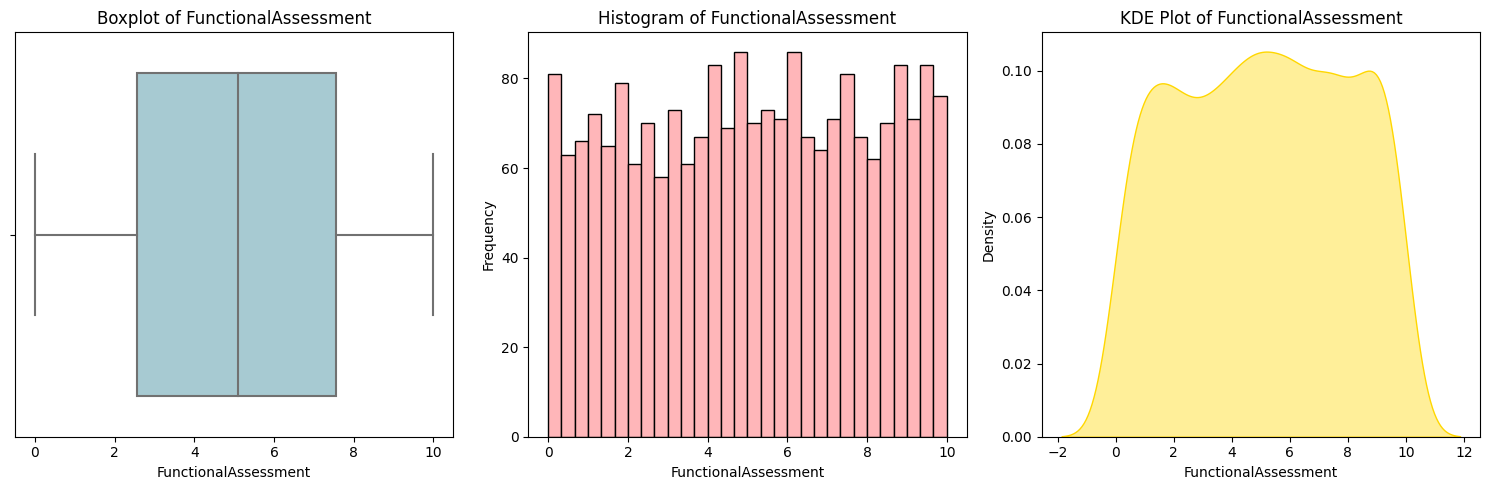

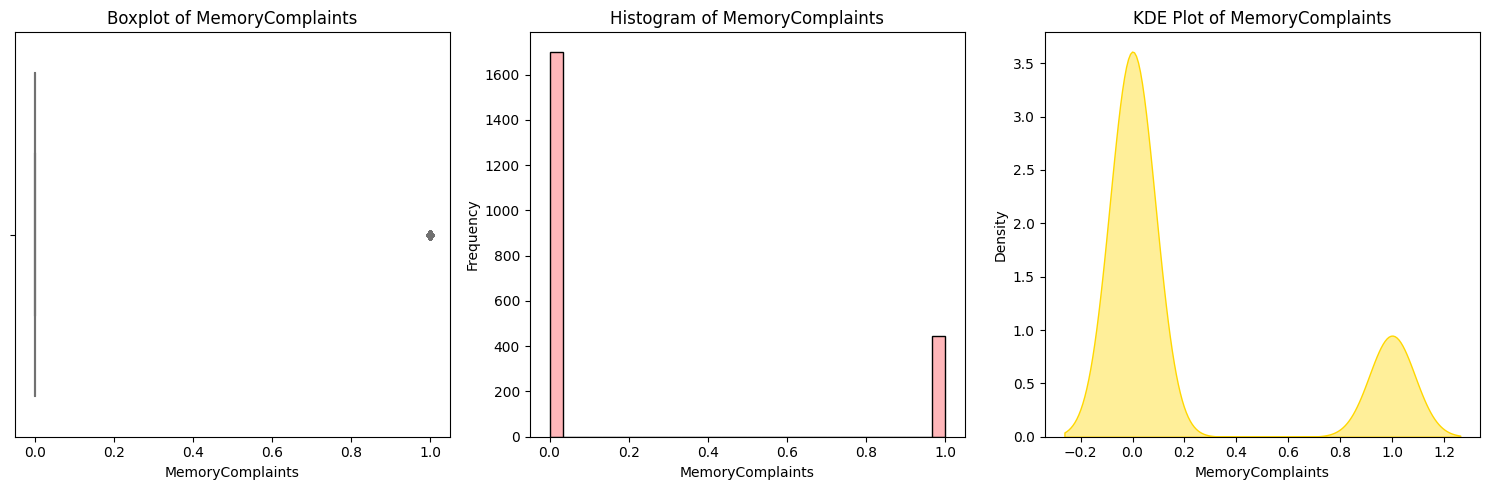

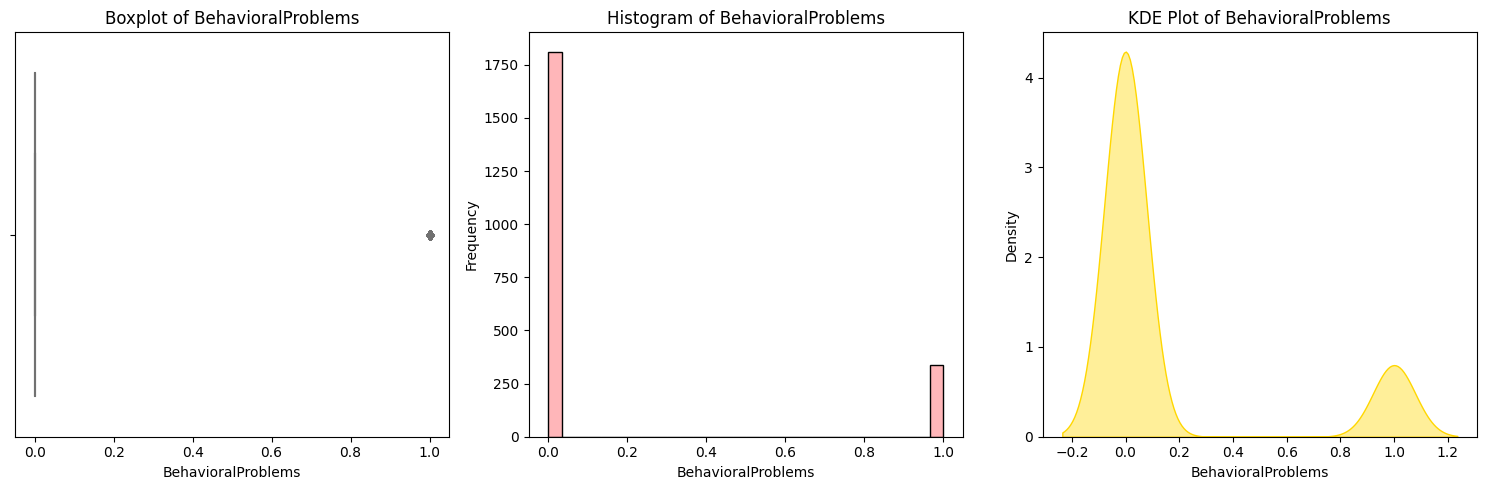

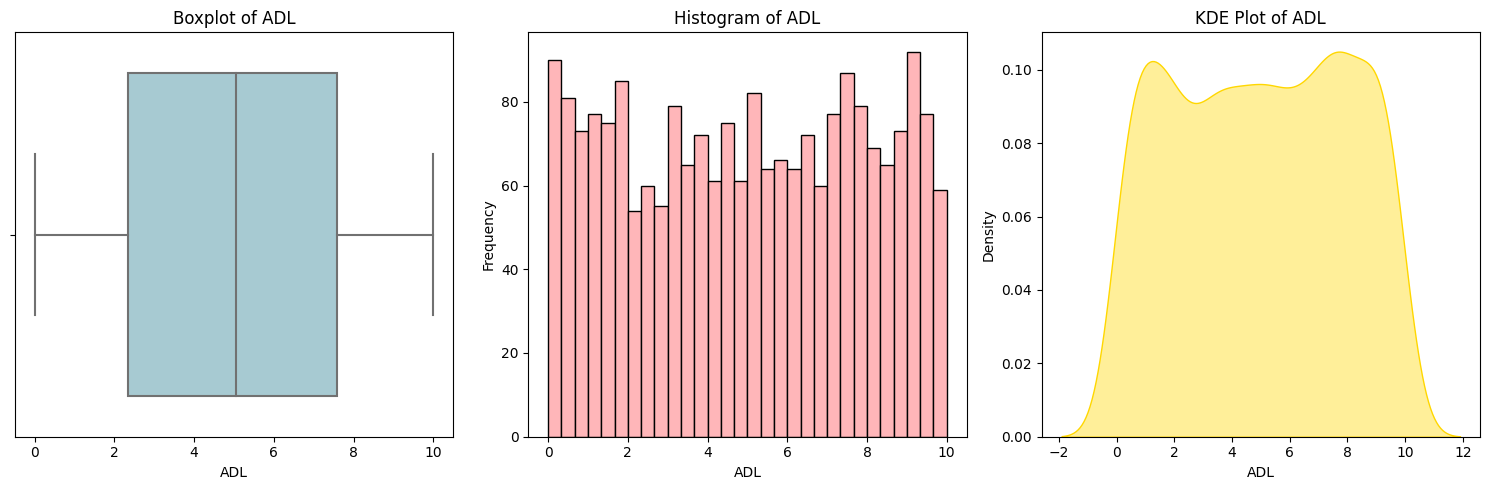

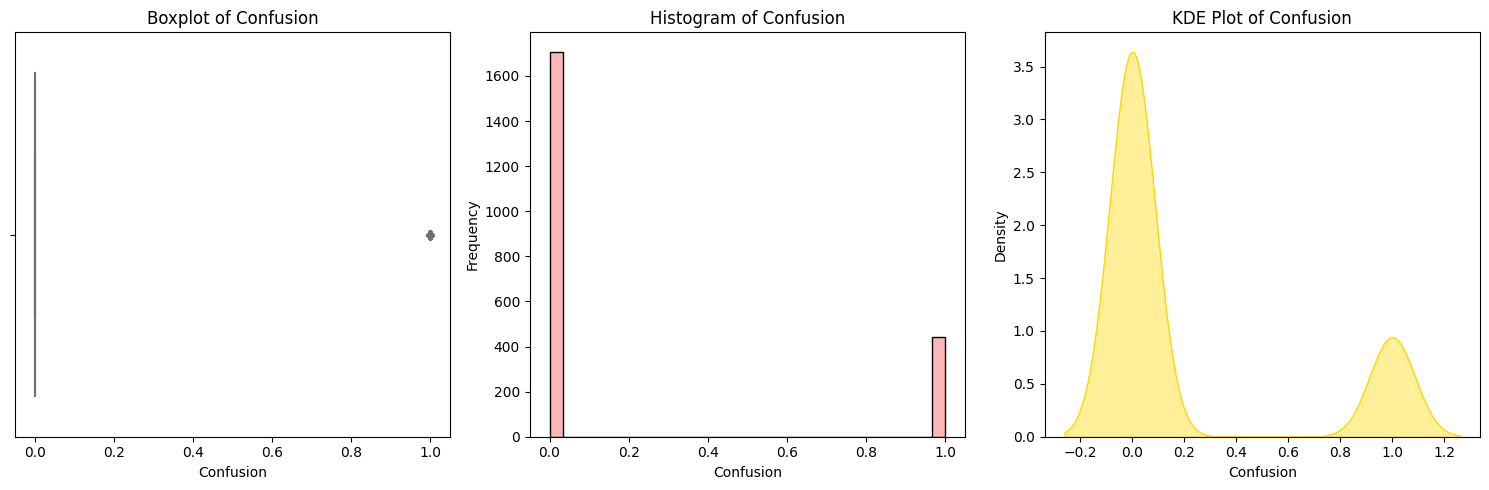

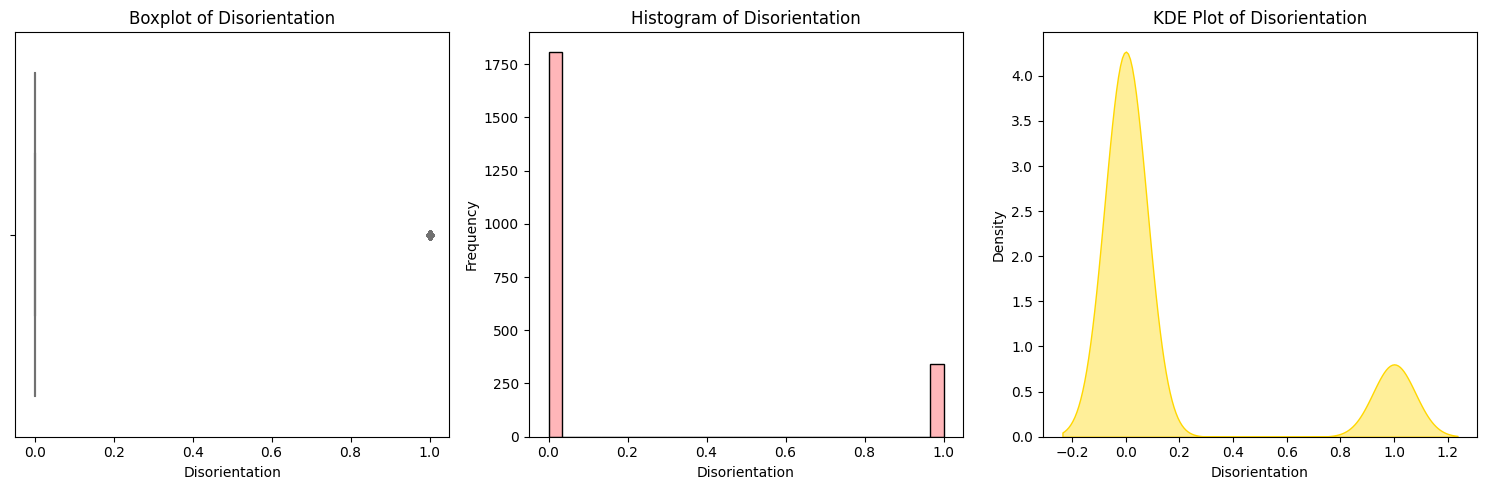

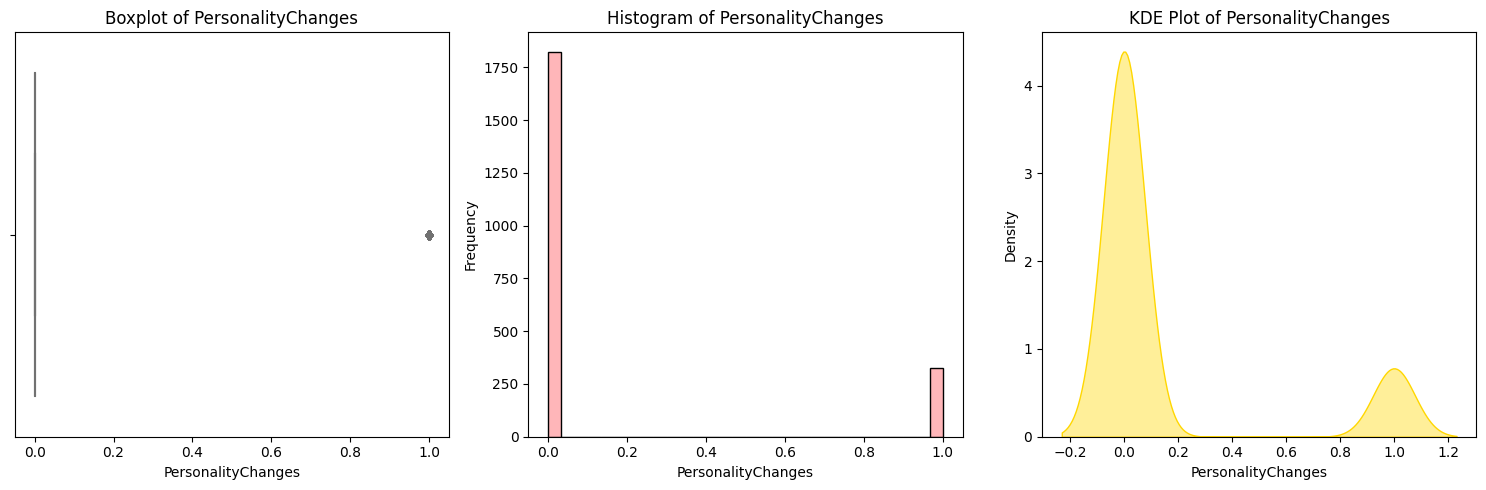

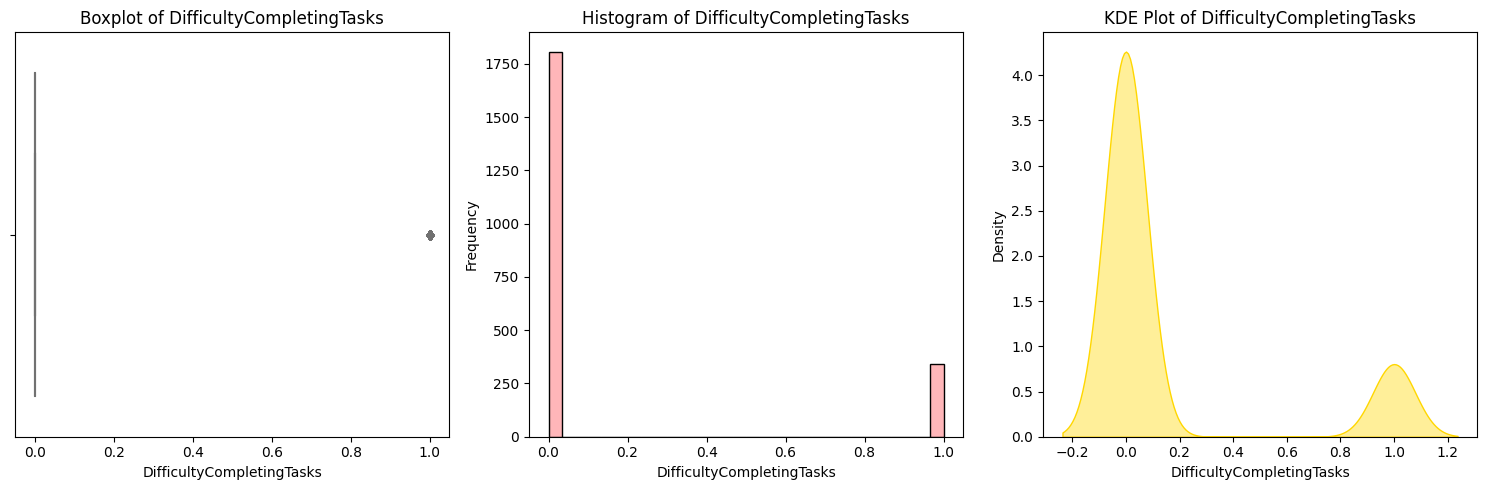

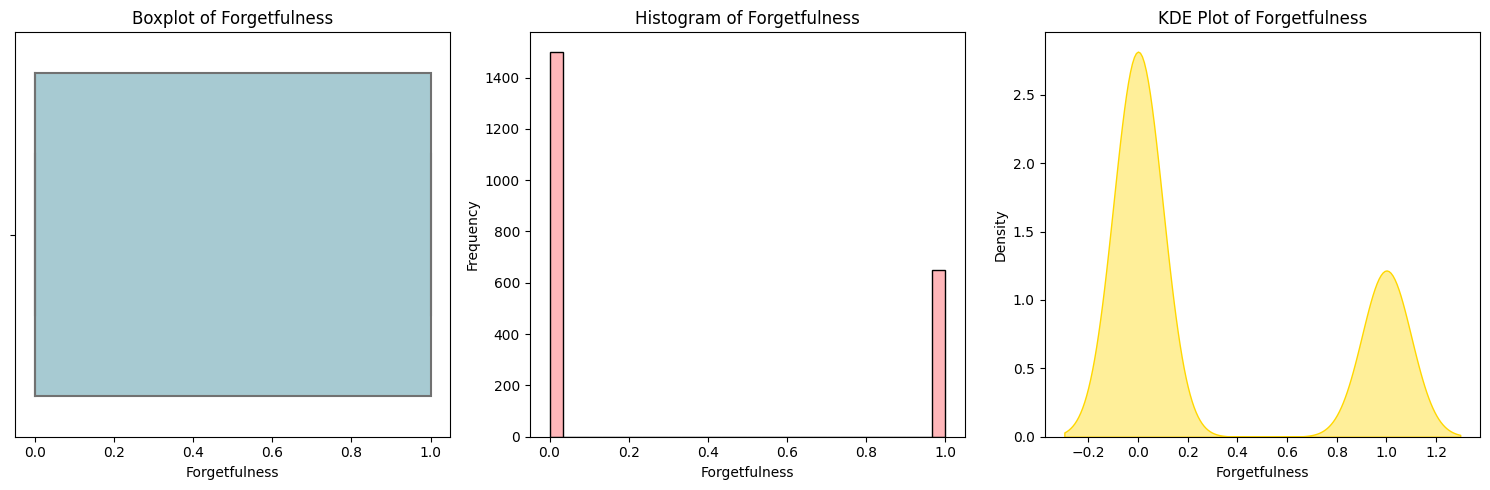

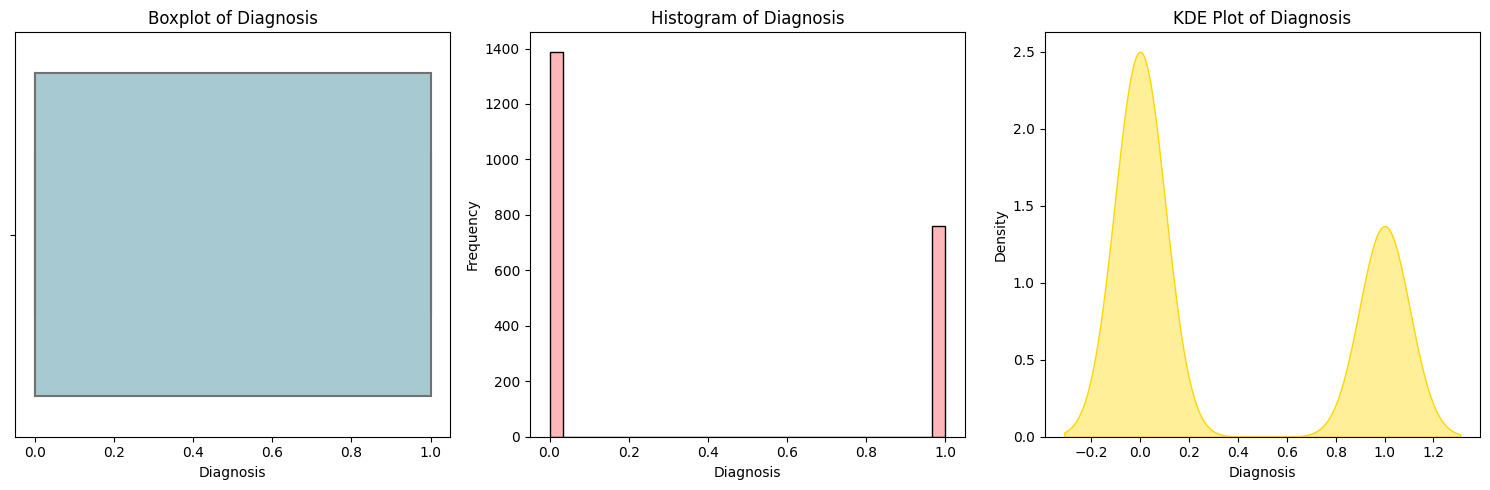

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#A0CED9', '#FFB6B9', '#FFD700']

# Plot the distribution for all the numerical features.
for col in df.columns:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Boxplot
    sns.boxplot(data=df, x=col, ax=ax[0], color=colors[0])
    ax[0].set_title(f'Boxplot of {col}')

    # Histogram
    ax[1].hist(df[col].dropna(), bins=30, edgecolor='k', color=colors[1])
    ax[1].set_title(f'Histogram of {col}')
    ax[1].set_xlabel(col)
    ax[1].set_ylabel('Frequency')

    # KDE Plot
    sns.kdeplot(data=df, x=col, ax=ax[2], color=colors[2], fill=True, alpha=0.4)
    ax[2].set_title(f'KDE Plot of {col}')

    plt.tight_layout()
    plt.show()

> No outliers detected

# **Data Preprocessing**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2149.0,74.908795,8.990221,60.000000,67.000000,75.000000,83.000000,90.000000
Gender,2149.0,0.506282,0.500077,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2149.0,0.697534,0.996128,0.000000,0.000000,0.000000,1.000000,3.000000
EducationLevel,2149.0,1.286645,0.904527,0.000000,1.000000,1.000000,2.000000,3.000000
BMI,2149.0,27.655697,7.217438,15.008851,21.611408,27.823924,33.869778,39.992767
Smoking,2149.0,0.288506,0.453173,0.000000,0.000000,0.000000,1.000000,1.000000
AlcoholConsumption,2149.0,10.039442,5.757910,0.002003,5.139810,9.934412,15.157931,19.989293
PhysicalActivity,2149.0,4.920202,2.857191,0.003616,2.570626,4.766424,7.427899,9.987429
DietQuality,2149.0,4.993138,2.909055,0.009385,2.458455,5.076087,7.558625,9.998346
SleepQuality,2149.0,7.051081,1.763573,4.002629,5.482997,7.115646,8.562521,9.999840


In [ ]:
ranges = df.max() - df.min()

cols_over_3 = ranges[ranges > 3]

print("Columns with range > 3:")
print(len(cols_over_3))
print(cols_over_3)

Columns with range > 3:
15
Age                          30.000000
BMI                          24.983916
AlcoholConsumption           19.987290
PhysicalActivity              9.983813
DietQuality                   9.988961
SleepQuality                  5.997212
SystolicBP                   89.000000
DiastolicBP                  59.000000
CholesterolTotal            149.900037
CholesterolLDL              149.734959
CholesterolHDL               79.976890
CholesterolTriglycerides    349.534668
MMSE                         29.986068
FunctionalAssessment          9.996007
ADL                           9.998459
dtype: float64


In [ ]:
df['Ethnicity'].value_counts()

Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64

In [ ]:
df['EducationLevel'].value_counts()

EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64

> Already encoded

## **Feature Engineering**

In [ ]:
df["BP_interaction"] = df["SystolicBP"] - df["DiastolicBP"]

> Represents the difference between systolic and diastolic blood pressure.

>High pulse pressure indicates stiffer arteries, which is linked to higher cardiovascular risk and can indirectly affect brain health and Alzheimer's risk.

In [ ]:
df["Cholesterol_Ratio"] = df["CholesterolLDL"] / df["CholesterolHDL"]

> Combines “bad” cholesterol (LDL) and “good” cholesterol (HDL) into a single indicator.

> A higher ratio → greater risk of atherosclerosis → reduced blood flow to the brain, potentially increasing Alzheimer's risk.

In [ ]:
df["TG_HDL_Index"] = df["CholesterolTriglycerides"] / df["CholesterolHDL"]

> Captures the balance between triglycerides (blood fats) and protective HDL.

> A high ratio → linked to metabolic syndrome and cardiovascular risk, which may also impact cognitive health.

In [ ]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'BP_interaction', 'Cholesterol_Ratio',
       'TG_HDL_Index'],
      dtype='object')

# **Modeling**

In [ ]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (1504, 35)
Test shape: (645, 35)


In [ ]:
models = {
        "Logistic Regression": LogisticRegression(max_iter=200),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=200),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "SVM": SVC(),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(
            n_estimators=300, learning_rate=0.05, max_depth=4,
            subsample=0.9, eval_metric='logloss'),
        "LightGBM": LGBMClassifier(n_estimators=400, learning_rate=0.05),
        "CatBoost": CatBoostClassifier(verbose=0)
    }


In [ ]:
def evaluate_models(X_train, X_test, y_train, y_test):

    results = []

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    for name, model in models.items():

        print(f"\n==================== {name} ====================")

        # fitting
        if name in ["KNN", "SVM"]:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # evaluation
        acc = accuracy_score(y_test, y_pred)
        print("Accuracy:", acc)
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {name}')
        plt.show()

        # store results
        results.append((name, acc))


    # comparison
    results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
    results_df = results_df.sort_values(by="Accuracy", ascending=False)

    print("\n========== Model Comparison ==========")
    print(results_df)

    return results_df


==================== Logistic Regression ====================
Accuracy: 0.8209302325581396
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       278
           1       0.77      0.70      0.74       152

    accuracy                           0.82       430
   macro avg       0.81      0.79      0.80       430
weighted avg       0.82      0.82      0.82       430

[[246  32]
 [ 45 107]]


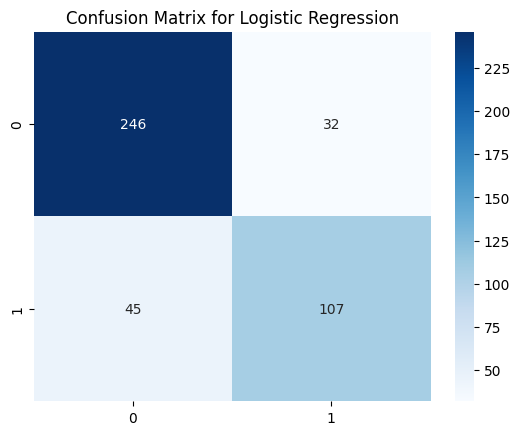


==================== Decision Tree ====================
Accuracy: 0.8860465116279069
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       278
           1       0.82      0.87      0.84       152

    accuracy                           0.89       430
   macro avg       0.87      0.88      0.88       430
weighted avg       0.89      0.89      0.89       430

[[249  29]
 [ 20 132]]


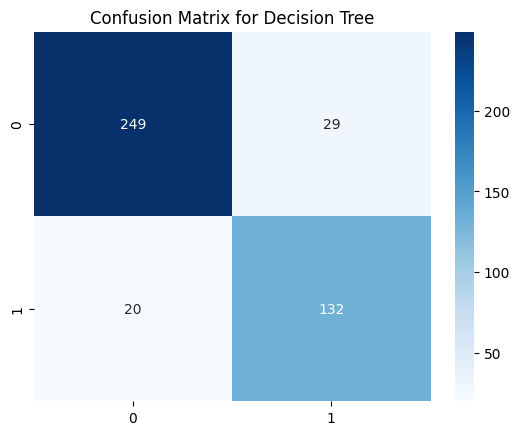


==================== Random Forest ====================
Accuracy: 0.9465116279069767
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       278
           1       0.95      0.89      0.92       152

    accuracy                           0.95       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.95      0.95      0.95       430

[[271   7]
 [ 16 136]]


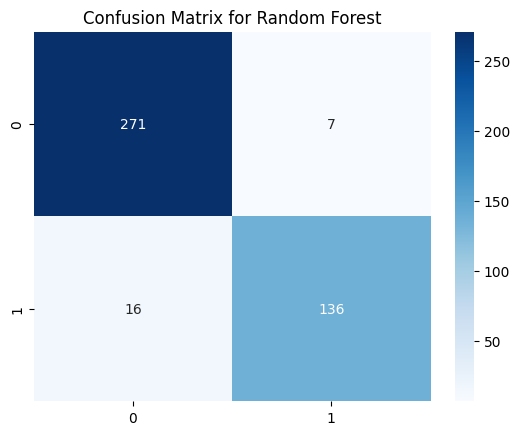


==================== KNN ====================
Accuracy: 0.7069767441860465
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       278
           1       0.62      0.43      0.51       152

    accuracy                           0.71       430
   macro avg       0.68      0.64      0.65       430
weighted avg       0.69      0.71      0.69       430

[[239  39]
 [ 87  65]]


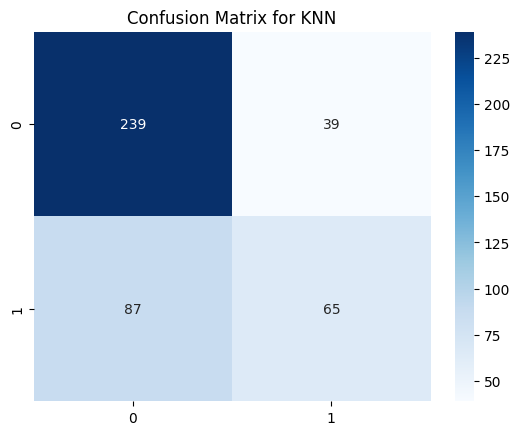


==================== SVM ====================
Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           0       0.85      0.90      0.88       278
           1       0.80      0.72      0.76       152

    accuracy                           0.84       430
   macro avg       0.83      0.81      0.82       430
weighted avg       0.84      0.84      0.83       430

[[251  27]
 [ 43 109]]


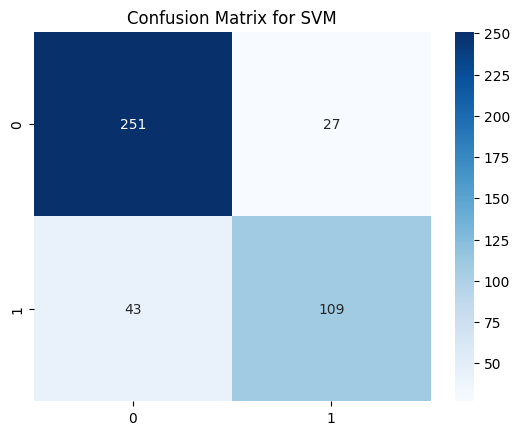


==================== Naive Bayes ====================
Accuracy: 0.7697674418604651
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       278
           1       0.66      0.70      0.68       152

    accuracy                           0.77       430
   macro avg       0.75      0.75      0.75       430
weighted avg       0.77      0.77      0.77       430

[[224  54]
 [ 45 107]]


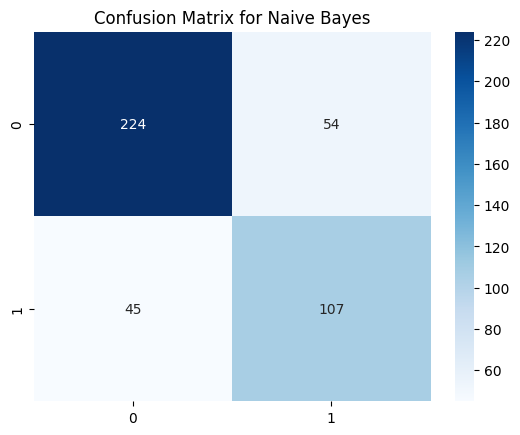


==================== XGBoost ====================
Accuracy: 0.9488372093023256
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       278
           1       0.95      0.91      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

[[270   8]
 [ 14 138]]


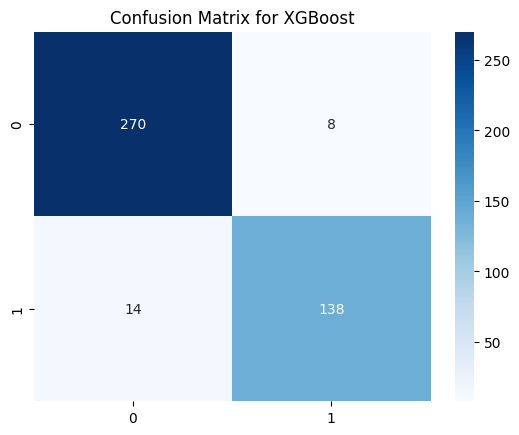


==================== LightGBM ====================
[LightGBM] [Info] Number of positive: 608, number of negative: 1111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3926
[LightGBM] [Info] Number of data points in the train set: 1719, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353694 -> initscore=-0.602841
[LightGBM] [Info] Start training from score -0.602841
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       278
           1       0.95      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.95      0.95      0.95       430

[[270   8]
 [ 12 140]]


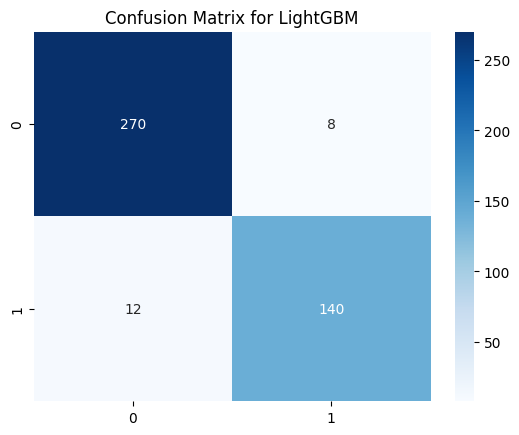


==================== CatBoost ====================
Accuracy: 0.9488372093023256
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       278
           1       0.93      0.92      0.93       152

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430

[[268  10]
 [ 12 140]]


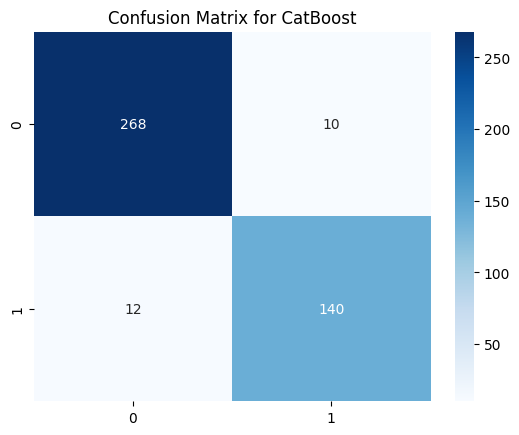


========== Model Comparison ==========
                 Model  Accuracy
7             LightGBM  0.953488
6              XGBoost  0.948837
8             CatBoost  0.948837
2        Random Forest  0.946512
1        Decision Tree  0.886047
4                  SVM  0.837209
0  Logistic Regression  0.820930
5          Naive Bayes  0.769767
3                  KNN  0.706977


,Model,Accuracy
7,LightGBM,0.953488
6,XGBoost,0.948837
8,CatBoost,0.948837
2,Random Forest,0.946512
1,Decision Tree,0.886047
4,SVM,0.837209
0,Logistic Regression,0.820930
5,Naive Bayes,0.769767
3,KNN,0.706977


In [ ]:
evaluate_models(X_train, X_test, y_train, y_test)

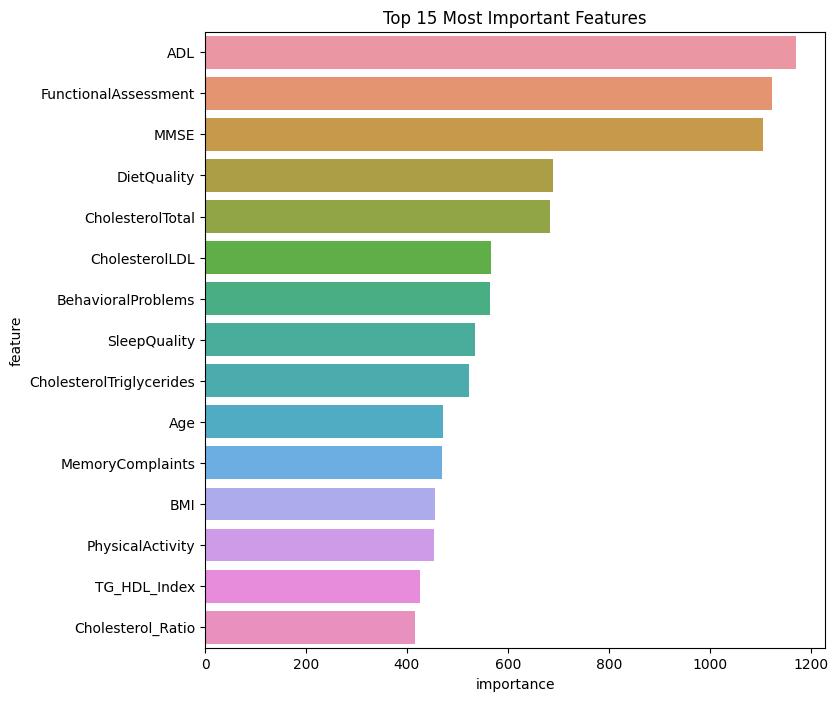

Top 15 Features: ['ADL', 'FunctionalAssessment', 'MMSE', 'DietQuality', 'CholesterolTotal', 'CholesterolLDL', 'BehavioralProblems', 'SleepQuality', 'CholesterolTriglycerides', 'Age', 'MemoryComplaints', 'BMI', 'PhysicalActivity', 'TG_HDL_Index', 'Cholesterol_Ratio']


In [ ]:
# Feature Importance
lgbm = models["LightGBM"]
importance = pd.DataFrame({
    "feature": X.columns,
    "importance": lgbm.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(data=importance.head(15), x="importance", y="feature")
plt.title("Top 15 Most Important Features")
plt.show()
top_features = importance.head(15)["feature"].tolist()
print("Top 15 Features:", top_features)

In [ ]:
# Retrain based on feature importance
X_reduced = X[top_features]
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=123, stratify=y
)


==================== Logistic Regression ====================
Accuracy: 0.8372093023255814
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       417
           1       0.80      0.72      0.76       228

    accuracy                           0.84       645
   macro avg       0.83      0.81      0.82       645
weighted avg       0.84      0.84      0.84       645

[[375  42]
 [ 63 165]]


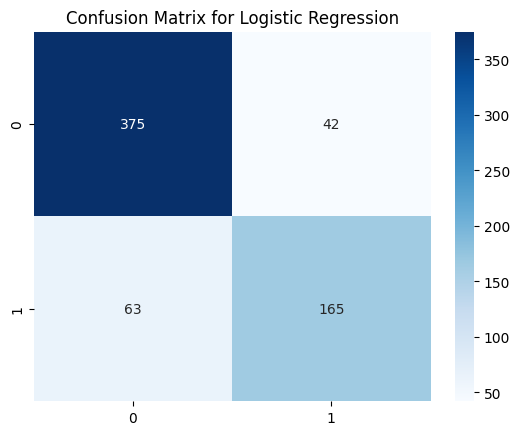


==================== Decision Tree ====================
Accuracy: 0.8976744186046511
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       417
           1       0.84      0.87      0.86       228

    accuracy                           0.90       645
   macro avg       0.89      0.89      0.89       645
weighted avg       0.90      0.90      0.90       645

[[380  37]
 [ 29 199]]


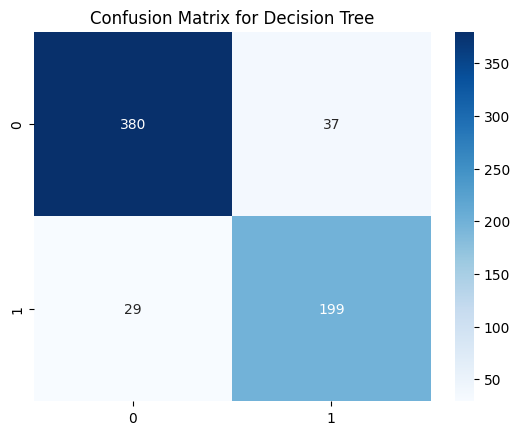


==================== Random Forest ====================
Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       417
           1       0.95      0.91      0.93       228

    accuracy                           0.95       645
   macro avg       0.95      0.94      0.95       645
weighted avg       0.95      0.95      0.95       645

[[407  10]
 [ 20 208]]


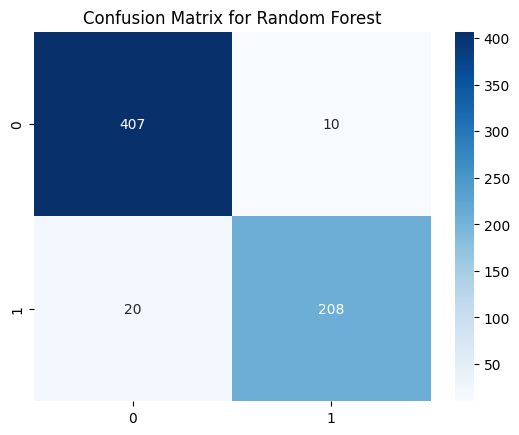


==================== KNN ====================
Accuracy: 0.8155038759689922
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       417
           1       0.74      0.73      0.74       228

    accuracy                           0.82       645
   macro avg       0.80      0.80      0.80       645
weighted avg       0.81      0.82      0.82       645

[[360  57]
 [ 62 166]]


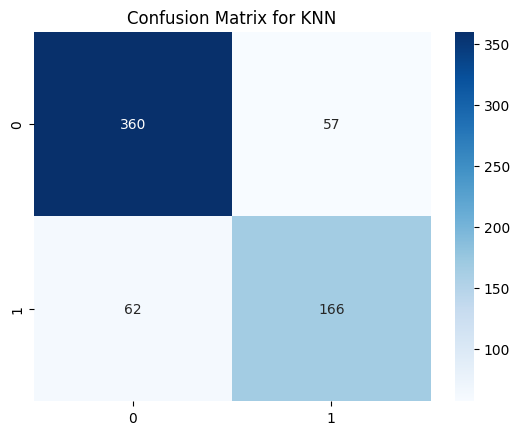


==================== SVM ====================
Accuracy: 0.8744186046511628
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       417
           1       0.87      0.76      0.81       228

    accuracy                           0.87       645
   macro avg       0.87      0.85      0.86       645
weighted avg       0.87      0.87      0.87       645

[[391  26]
 [ 55 173]]


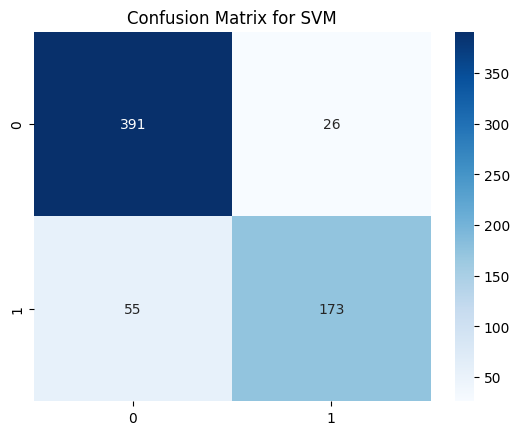


==================== Naive Bayes ====================
Accuracy: 0.8077519379844961
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       417
           1       0.73      0.72      0.73       228

    accuracy                           0.81       645
   macro avg       0.79      0.79      0.79       645
weighted avg       0.81      0.81      0.81       645

[[356  61]
 [ 63 165]]


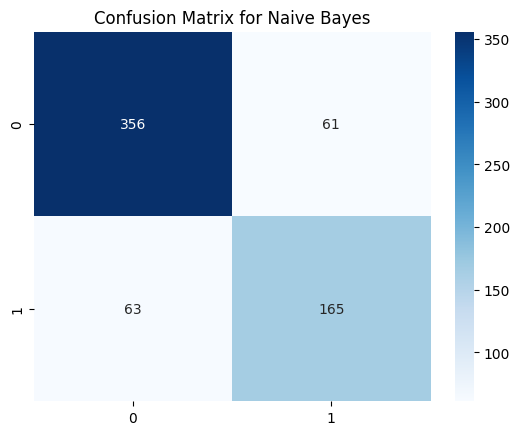


==================== XGBoost ====================
Accuracy: 0.9612403100775194
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       417
           1       0.95      0.94      0.94       228

    accuracy                           0.96       645
   macro avg       0.96      0.96      0.96       645
weighted avg       0.96      0.96      0.96       645

[[406  11]
 [ 14 214]]


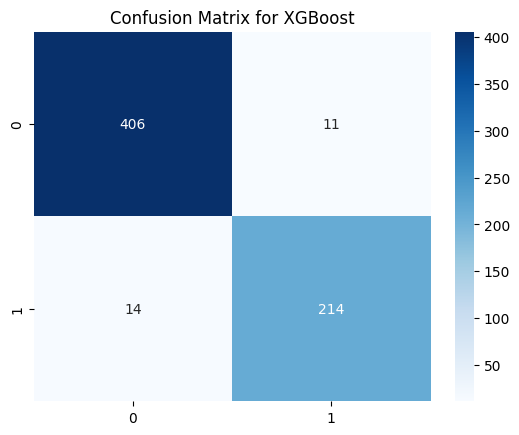


==================== LightGBM ====================
[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
Accuracy: 0.9658914728682171
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       417
           1       0.96      0.95      0.95       228

    accuracy                           0.97       645
   macro avg       0.96      0.96      0.96       645
weighted avg       0.97      0.97      0.97       645

[[407  10]
 [ 12 216]]


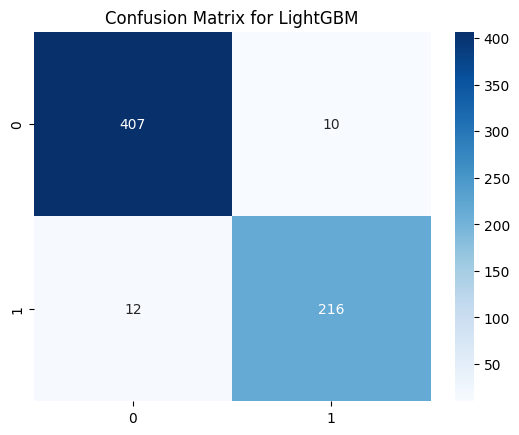


==================== CatBoost ====================
Accuracy: 0.9643410852713178
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       417
           1       0.95      0.95      0.95       228

    accuracy                           0.96       645
   macro avg       0.96      0.96      0.96       645
weighted avg       0.96      0.96      0.96       645

[[406  11]
 [ 12 216]]


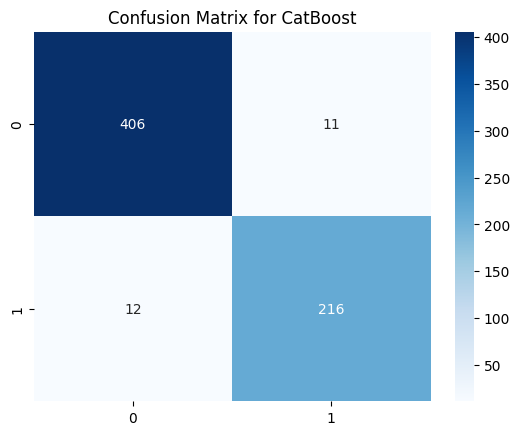


========== Model Comparison ==========
                 Model  Accuracy
7             LightGBM  0.965891
8             CatBoost  0.964341
6              XGBoost  0.961240
2        Random Forest  0.953488
1        Decision Tree  0.897674
4                  SVM  0.874419
0  Logistic Regression  0.837209
3                  KNN  0.815504
5          Naive Bayes  0.807752


,Model,Accuracy
7,LightGBM,0.965891
8,CatBoost,0.964341
6,XGBoost,0.961240
2,Random Forest,0.953488
1,Decision Tree,0.897674
4,SVM,0.874419
0,Logistic Regression,0.837209
3,KNN,0.815504
5,Naive Bayes,0.807752


In [ ]:
evaluate_models(X_train, X_test, y_train, y_test)

## **Inference**

In [ ]:
lgbm_model = models["LightGBM"]

user_input = {}
print("من فضلك أدخل القيم للـ 15 feature:")

for feature in top_features:
    while True:
        try:
            val = float(input(f"{feature}: "))
            user_input[feature] = [val]
            break
        except ValueError:
            print("أدخل رقم صحيح.")

user_df = pd.DataFrame(user_input)

prediction = lgbm_model.predict(user_df)
prediction_proba = lgbm_model.predict_proba(user_df)

print("\n=== التنبؤ ===")
print("Predicted class:", prediction[0])
print("Probability for each class:", prediction_proba[0])


من فضلك أدخل القيم للـ 15 feature:


ADL:  4
FunctionalAssessment:  5
MMSE:  15
DietQuality:  6
CholesterolTotal:  220
CholesterolLDL:  125
BehavioralProblems:  0
SleepQuality:  7
CholesterolTriglycerides:  230
Age:  75
MemoryComplaints:  1
BMI:  28
PhysicalActivity:  2
TG_HDL_Index:  4.5
Cholesterol_Ratio:  125/60


أدخل رقم صحيح.


Cholesterol_Ratio:  125



=== التنبؤ ===
Predicted class: 1
Probability for each class: [0.00765777 0.99234223]


In [ ]:
class_mapping = {
    0: "No Alzheimer's detected",
    1: "Alzheimer's detected"
}

# Predicted class
pred_class = prediction[0]
pred_class_name = class_mapping[pred_class]

prob_0, prob_1 = prediction_proba[0]

print("\n===Final prediction===")
print(f"Prediction: {pred_class_name}")
print(f"Probability:")
print(f"  - No Alzheimer's: {prob_0*100:.2f}%")
print(f"  - Alzheimer's: {prob_1*100:.2f}%")

if pred_class == 1:
    print("\nInterpretation: The model predicts a high likelihood of Alzheimer's for this patient.")
else:
    print("\nInterpretation: The model predicts a low likelihood of Alzheimer's for this patient.")


===Final prediction===
Prediction: Alzheimer's detected
Probability:
  - No Alzheimer's: 0.77%
  - Alzheimer's: 99.23%

Interpretation: The model predicts a high likelihood of Alzheimer's for this patient.


## **Save Best Model & Features**

In [ ]:
X_reduced = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, random_state=123, stratify=y
)

lgbm_model = LGBMClassifier(n_estimators=400, learning_rate=0.05, random_state=123)
lgbm_model.fit(X_train, y_train)

pickle.dump(lgbm_model, open("alz_lgbm_model.pkl", "wb"))

[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3096
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712


In [ ]:
model_features = top_features

pickle.dump(model_features, open("model_features.pkl", "wb"))